
# Case Study: Developing a Machine Learning Model to predict which customers are likely to default on their payments

# Data Description:

# # CUST_ID: Unique customer ID number
## AGE: Age of the customer
## GENDER: Gender of the customer (1 = male, 2 = female)
## QUALIFICATION: Educational qualification of the customer (1 = high school, 2 = graduate, 3 = postgraduate, 4 = Others)
## FAMILY_STATUS: Marital status of the customer (1 = married, 2 = single, 3 = Others)

## CC_LIMIT: Credit card limit assigned to the customer
## APR_PAY - SEPT_PAY: Repayment status of the customer's credit card balance for each month from April to September (-2 = no consumption, -1 = paid in full, 0 = use of revolving credit, 1 = payment delay for one month, 2 = payment delay for two months, and so on)
## APR_BILL - SEPT_BILL: Amount of bill statement for each month from April to September
## APR_PAID - SEPT_PAID: Amount of payment made by the customer for each month from April to September
## TARGET_DEFAULT: Target variable indicating whether the customer defaulted on their credit card payment (1 = defaulted, 0 = not defaulted)

# Introduction:

## Credit card companies have been providing their services to the people for several years now. It has become a very convenient mode of payment and is widely used by the people for their day-to-day expenses. However, with the increase in the number of credit card users, there has been a rise in the number of customers who default on their credit card payments. This is a serious issue for credit card companies as it not only results in the loss of revenue but also affects their credibility. Therefore, it is essential to predict which customers are likely to default on their payments so that appropriate actions can be taken to prevent it.

#  Business Objective:

# 
* **Objective of our project is to predict which customer might default in upcoming months. Before going any further let's have a quick look on defination of what actually meant by Credit Card Default.** 


* **We are all aware what is credit card. It is type of payment payment card in which charges are made against a line of credit instead of the account holder's cash deposits. When someone uses a credit card to make a purchase, that person's account accrues a balance that must be paid off each month.**




* **Credit card default happens when you have become severely delinquent on your credit card payments.Missing credit card payments once or twice does not count as a default. A payment default occurs when you fail to pay the Minimum Amount Due on the credit card for a few consecutive months.**

* **So now we know what a credit card is. Now let's see one of problems faced by companies who provide credit cards. Yes it is the peolpe who do not clear off the credit card debt aka credit card defaulters**.

* ***The research aims at developing a mechanism to predict the credit card default beforehand and to identify the potential customer base that can be offered various credit instruments so as to invite minimum default.***

# **Loading Dataset and Importing Modules**

In [378]:
#let's import the modules for EDA part
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

##Mount the drive and import the datset

In [379]:
#load the seol bike data set from drive
credit_df=pd.read_csv('Dataset.csv')

# **Understand More About The Data**

##summary of data

In [380]:
# Viewing the data of top 5 rows to take a glimps of the data
credit_df.head()

,CUST_ID,AGE,GENDER,QUALIFICATION,FAMILY_STATUS,CC_LIMIT,APR_PAY,MAY_PAY,JUN_PAY,JUL_PAY,...,JUL_BILL,AUG_BILL,SEPT_BILL,APR_PAID,MAY_PAID,JUN_PAID,JUL_PAID,AUG_PAID,SEPT_PAID,TARGET_DEFAULT
0,18064,56,2,1,1,242550,-1,-1,-2,-2,...,0.00,0.00,0.00,181.91,330.75,6492.62,0.00,0.00,0.00,0
1,24524,36,2,1,1,110250,-2,-2,0,0,...,27862.38,57013.58,104512.59,0.00,0.00,0.00,0.00,1102.50,2892.96,0
2,40165,26,1,1,2,88200,0,0,0,0,...,76661.24,85817.50,85330.19,1653.75,2553.39,1671.39,1314.18,3099.13,3669.12,0
3,18744,28,2,1,2,264600,0,0,0,0,...,18416.16,32092.67,33265.73,4410.00,2756.25,0.00,3865.36,4410.00,5522.42,0
4,15813,36,1,2,2,55125,-2,-2,2,2,...,54463.50,56152.53,51499.98,0.00,0.00,0.00,2205.00,0.00,5512.50,0


In [381]:
# View the data of bottom 5 rows to take a glimps of the data
credit_df.tail()

,CUST_ID,AGE,GENDER,QUALIFICATION,FAMILY_STATUS,CC_LIMIT,APR_PAY,MAY_PAY,JUN_PAY,JUL_PAY,...,JUL_BILL,AUG_BILL,SEPT_BILL,APR_PAID,MAY_PAID,JUN_PAID,JUL_PAID,AUG_PAID,SEPT_PAID,TARGET_DEFAULT
9995,48380,43,2,3,1,55125,0,2,2,2,...,19427.15,16176.98,16773.44,4189.5,1102.50,0.0,882.00,3528.00,0.00,0
9996,25334,26,2,2,1,88200,0,0,0,0,...,79669.96,83438.30,83134.01,3307.5,2756.25,1984.5,1907.32,2425.50,3307.50,0
9997,20566,31,1,2,1,77175,0,0,0,0,...,70346.12,68438.79,67447.64,1102.5,611.89,8599.5,2374.79,3858.75,5843.25,1
9998,33506,25,1,2,2,99225,0,0,0,0,...,73789.22,74812.34,88131.65,2205.0,2205.00,3307.5,3307.50,3307.50,3307.50,0
9999,47087,43,1,2,1,22050,0,2,2,2,...,7727.42,8012.97,6853.14,441.0,200.66,0.0,1543.50,0.00,1440.97,0


In [382]:
#Getting the shape of dataset with rows and columns
print(credit_df.shape)

(10000, 25)


In [383]:
#Getting all the columns
print("Features of the dataset:")
credit_df.columns

Features of the dataset:


Index(['CUST_ID', 'AGE', 'GENDER', 'QUALIFICATION', 'FAMILY_STATUS',
       'CC_LIMIT', 'APR_PAY', 'MAY_PAY', 'JUN_PAY', 'JUL_PAY', 'AUG_PAY',
       'SEPT_PAY', 'APR_BILL', 'MAY_BILL', 'JUN_BILL', 'JUL_BILL', 'AUG_BILL',
       'SEPT_BILL', 'APR_PAID', 'MAY_PAID', 'JUN_PAID', 'JUL_PAID', 'AUG_PAID',
       'SEPT_PAID', 'TARGET_DEFAULT'],
      dtype='object')

In [384]:
#check details about the data set
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   CUST_ID         10000 non-null  int64  
 1   AGE             10000 non-null  int64  
 2   GENDER          10000 non-null  int64  
 3   QUALIFICATION   10000 non-null  int64  
 4   FAMILY_STATUS   10000 non-null  int64  
 5   CC_LIMIT        10000 non-null  int64  
 6   APR_PAY         10000 non-null  int64  
 7   MAY_PAY         10000 non-null  int64  
 8   JUN_PAY         10000 non-null  int64  
 9   JUL_PAY         10000 non-null  int64  
 10  AUG_PAY         10000 non-null  int64  
 11  SEPT_PAY        10000 non-null  int64  
 12  APR_BILL        10000 non-null  float64
 13  MAY_BILL        10000 non-null  float64
 14  JUN_BILL        10000 non-null  float64
 15  JUL_BILL        10000 non-null  float64
 16  AUG_BILL        10000 non-null  float64
 17  SEPT_BILL       10000 non-null  

In [385]:
#print the unique value
credit_df.nunique()

CUST_ID           10000
AGE                  54
GENDER                2
QUALIFICATION         7
FAMILY_STATUS         4
CC_LIMIT             73
APR_PAY              10
MAY_PAY               9
JUN_PAY               9
JUL_PAY               9
AUG_PAY              10
SEPT_PAY             11
APR_BILL           7603
MAY_BILL           7810
JUN_BILL           7950
JUL_BILL           8098
AUG_BILL           8198
SEPT_BILL          8364
APR_PAID           3260
MAY_PAID           3179
JUN_PAID           3300
JUL_PAID           3552
AUG_PAID           3752
SEPT_PAID          3757
TARGET_DEFAULT        2
dtype: int64

In [386]:
#Looking for the description of the dataset to get insights of the data
credit_df.describe().T

,count,mean,std,min,25%,50%,75%,max
CUST_ID,10000.0,32628.399200,10004.460462,15502.00,23902.0000,32665.000,41347.2500,49853.00
AGE,10000.0,35.531000,9.234076,21.00,28.0000,34.000,42.0000,75.00
GENDER,10000.0,1.601700,0.489572,1.00,1.0000,2.000,2.0000,2.00
QUALIFICATION,10000.0,1.856300,0.790641,0.00,1.0000,2.000,2.0000,6.00
FAMILY_STATUS,10000.0,1.548500,0.521033,0.00,1.0000,2.000,2.0000,3.00
CC_LIMIT,10000.0,184810.972500,142715.991271,11025.00,55125.0000,154350.000,264600.0000,882000.00
APR_PAY,10000.0,-0.313600,1.153945,-2.00,-1.0000,0.000,0.0000,8.00
MAY_PAY,10000.0,-0.284100,1.122637,-2.00,-1.0000,0.000,0.0000,7.00
JUN_PAY,10000.0,-0.244200,1.148259,-2.00,-1.0000,0.000,0.0000,7.00
JUL_PAY,10000.0,-0.190300,1.187867,-2.00,-1.0000,0.000,0.0000,7.00


* ***This Dataset contains 10000 lines and 25 columns.***
* ***default payment next month is our target variable we need to focus on this***


# Features description

# **Preprocessing the dataset**

**Why do we need to handle missing values?**
* ***The real-world data often has a lot of missing values. The cause of missing values can be data corruption or failure to record data. The handling of missing data is very important during the preprocessing of the dataset as many machine learning algorithms do not support missing values.that's why we check missing values first***

##Missing values

In [387]:
#check for count of missing values in each column.
credit_df.isna().sum()
credit_df.isnull().sum()

CUST_ID           0
AGE               0
GENDER            0
QUALIFICATION     0
FAMILY_STATUS     0
CC_LIMIT          0
APR_PAY           0
MAY_PAY           0
JUN_PAY           0
JUL_PAY           0
AUG_PAY           0
SEPT_PAY          0
APR_BILL          0
MAY_BILL          0
JUN_BILL          0
JUL_BILL          0
AUG_BILL          0
SEPT_BILL         0
APR_PAID          0
MAY_PAID          0
JUN_PAID          0
JUL_PAID          0
AUG_PAID          0
SEPT_PAID         0
TARGET_DEFAULT    0
dtype: int64

<Figure size 1600x500 with 0 Axes>

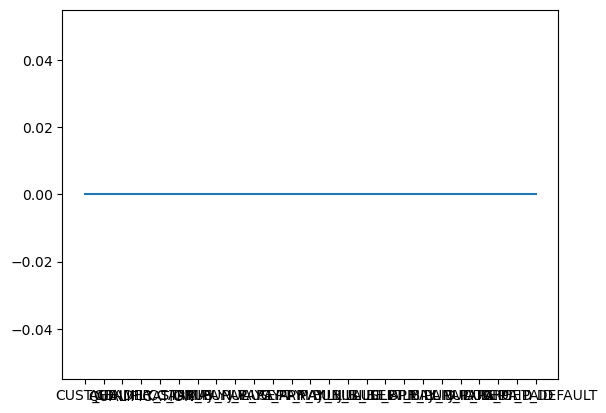

<Figure size 1600x500 with 0 Axes>

In [388]:
#plot the graph to check wether there are any missing value present
missing=plt.plot(((credit_df.isnull().sum())*100)/credit_df.shape[0])
plt.figure(figsize=(16,5))

* ***As we can see above there are no missing value presents thankfully***

# Duplicate values

In [389]:
# Checking Duplicate Values
value=len(credit_df[credit_df.duplicated()])
print("The number of duplicate values in the data set is = ",value)

The number of duplicate values in the data set is =  0


* ***In the above data after count the missing and duplicate value we came to know that there are no missing and duplicate value present.***

# **Exploratory Data Analysis**

**Why do we perform EDA?**
* ***An EDA is a thorough examination meant to uncover the underlying structure of a data set and is important for a company because it exposes trends, patterns, and relationships that are not readily apparent.***

## **Univariate Analysis**

## **Analysis of Dependent Variable:**

In [390]:
#renaming for better convinience
credit_df.rename(columns={'TARGET_DEFAULT' : 'default_payment_next_month'}, inplace=True)
credit_df.rename(columns={'GENDER' : 'SEX'}, inplace=True)
credit_df.rename(columns={'QUALIFICATION' : 'EDUCATION'}, inplace=True)
credit_df.rename(columns={'FAMILY_STATUS' : 'MARRIAGE'}, inplace=True)

In [391]:
# counts the dependent variable data set
credit_df['default_payment_next_month'].value_counts()

0    7781
1    2219
Name: default_payment_next_month, dtype: int64

In [392]:
# Get the proportion of customers who had default payment in the next month
# About 22% customers had default payment next month

credit_df['default_payment_next_month'].value_counts(normalize=True)

0    0.7781
1    0.2219
Name: default_payment_next_month, dtype: float64

0    7781
1    2219
Name: default_payment_next_month, dtype: int64

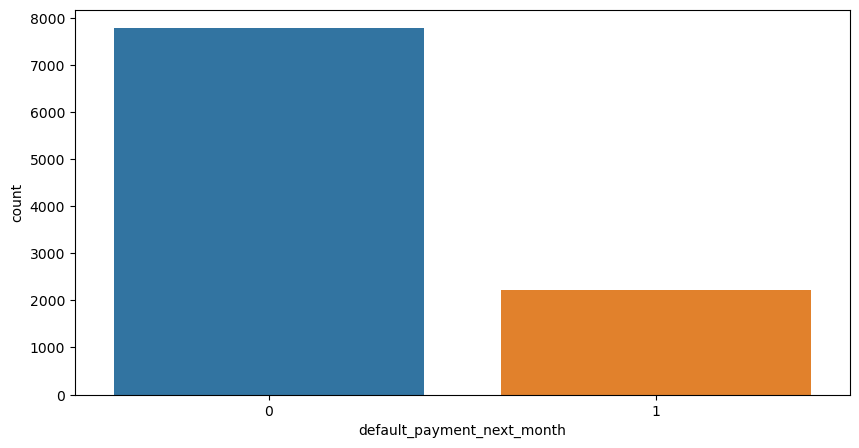

In [581]:
#plotting the count plot to vizualize the data distribution
#plot the count plot to check the data distribution
plt.figure(figsize=(10,5))
sns.countplot(x = 'default_payment_next_month', data = credit_df)
credit_df['default_payment_next_month'].value_counts()

**From the above data analysis we can say that**
*   **0 - Not Default**
*   **1 - Default**
*   **Defaulters are less than the Non Defaulters in the given dataset.**



***As we can see from above graph that both classes are not in proportion and we have imbalanced dataset. we need to do normalize the data in next step.***




## **Analysis of Independent Variable:**

## **Categorical  Features**

***We have few categorical features in our dataset that are***
*   gender
*   qualification
*   family status
*   age

***Categorical variables are qualitative data in which the values are assigned to a set of distinct groups or categories. These groups may consist of alphabetic (e.g., male, female) or numeric labels (e.g., male = 0, female = 1) that do not contain mathematical information beyond the frequency counts related to group membership.***

 ***Let'Check how they are related with out target class.***


### **SEX**



*   1 - Male
*   2 - Female


In [394]:
# counts the SEX variable data set
credit_df['SEX'].value_counts()

2    6017
1    3983
Name: SEX, dtype: int64

<Axes: xlabel='SEX', ylabel='count'>

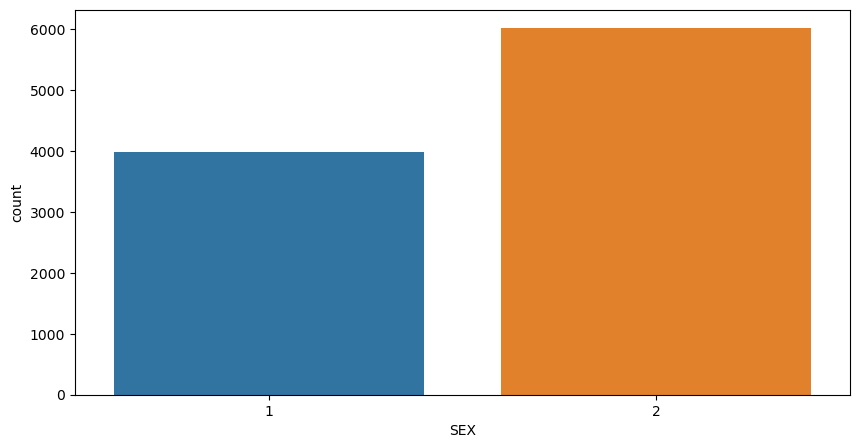

In [395]:
#plotting the count plot to vizualize the data distribution
plt.figure(figsize=(10,5))
sns.countplot(x = 'SEX', data = credit_df)

**From the above data analysis we can say that**
*   **1 - Male**
*   **2 - Female**
*   ***Number of Male credit holder is less than Female.***

### **Education**



 **1 = graduate school; 2 = university; 3 = high school; 0 = others**

In [396]:
# counts the education  data set variable data set
credit_df['EDUCATION'].value_counts()

2    4674
1    3510
3    1652
5      87
4      53
6      17
0       7
Name: EDUCATION, dtype: int64

***'EDUCATION' column: notice 5 and 6 are both recorded as 'unknown' and there is 0 which isn't explained in the dataset description. Since the amounts are so small, let's combine 0,4,5,6 to 0 which means"other'.***

In [397]:
# Change values 4, 5, 6 to 0 and define 0 as 'others'
# 1=graduate school, 2=university, 3=high school, 0=others

credit_df["EDUCATION"] = credit_df["EDUCATION"].replace({4:0,5:0,6:0})
credit_df["EDUCATION"].value_counts()

2    4674
1    3510
3    1652
0     164
Name: EDUCATION, dtype: int64

<Axes: xlabel='EDUCATION', ylabel='count'>

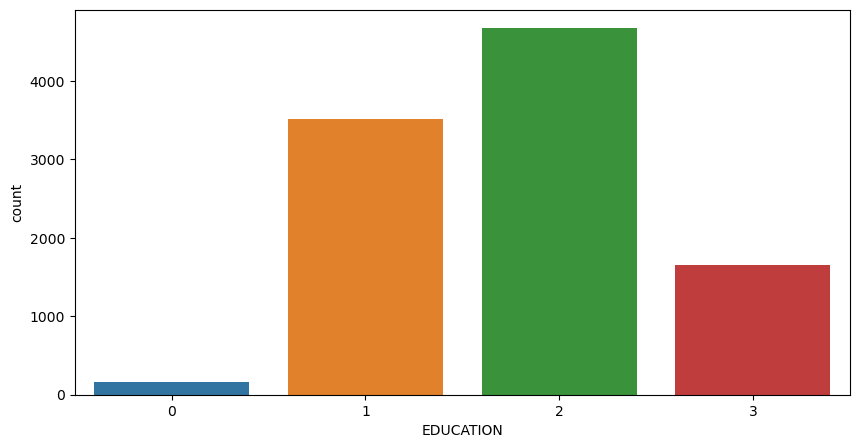

In [398]:
#plotting the count plot to vizualize the data distribution
plt.figure(figsize=(10,5))
sns.countplot(x = 'EDUCATION', data = credit_df)

**From the above data analysis we can say that**
*   ***More number of credit holders are university students followed by Graduates and then High school students.***

### **Marriage**


**1 = married; 2 = single; 3 = others**

In [399]:
# From dataset description: MARRIAGE: Marital status (1=married, 2=single, 3=others), but there is also 0

credit_df["MARRIAGE"].unique()

array([1, 2, 3, 0], dtype=int64)

In [400]:
# counts the education  data set
credit_df['MARRIAGE'].value_counts()

2    5298
1    4583
3     102
0      17
Name: MARRIAGE, dtype: int64

In [401]:
# How many customers had "MARRIAGE" status as 0?

credit_df["MARRIAGE"].value_counts(normalize=True)

2    0.5298
1    0.4583
3    0.0102
0    0.0017
Name: MARRIAGE, dtype: float64

***'MARRIAGE' column: what does 0 mean in 'MARRIAGE'?***
***Since there are only 0.18% (or 54) observations of 0, we will combine 0 and 3 in one value as 'others'.***

In [402]:
# Combine 0 and 3 by changing the value 0 into others

credit_df["MARRIAGE"] = credit_df["MARRIAGE"].replace({0:3})
credit_df["MARRIAGE"].value_counts(normalize=True)

2    0.5298
1    0.4583
3    0.0119
Name: MARRIAGE, dtype: float64

<Axes: xlabel='MARRIAGE', ylabel='count'>

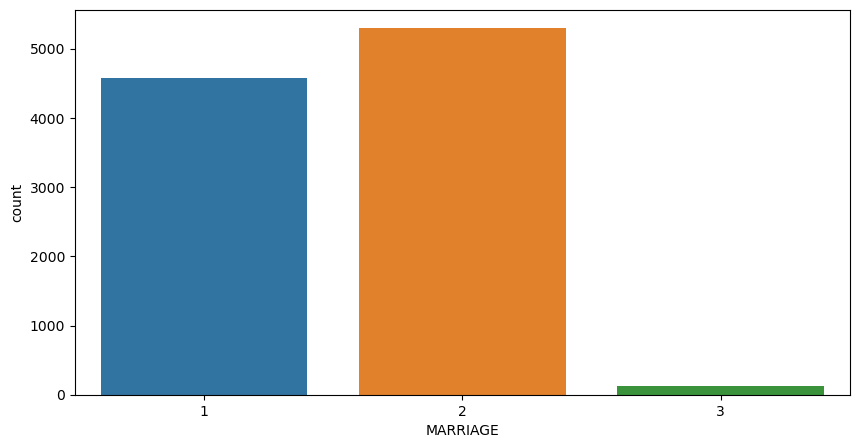

In [403]:
#plotting the count plot to vizualize the data distribution
plt.figure(figsize=(10,5))
sns.countplot(x = 'MARRIAGE', data = credit_df)

**From the above data analysis we can say that**
*   **1 - married**
*   **2 - single**
*   **3 - others**
*   ***More number of credit cards holder are Single.***


### **AGE**

**Plotting graph of number of ages of all people with credit card irrespective of gender.**

In [404]:
# counts the education  data set
credit_df['AGE'].value_counts()

29    546
27    497
30    488
28    473
31    404
26    402
36    388
34    386
25    381
24    380
33    379
32    369
35    349
37    331
39    324
38    313
23    310
42    294
40    283
41    261
43    252
44    228
45    203
46    184
22    180
47    170
49    154
48    148
50    135
51    121
53    117
52     92
54     84
55     71
56     55
58     48
57     30
59     29
21     24
61     20
60     20
62     15
64     12
66     11
65     10
63     10
69      6
70      5
67      3
68      1
72      1
73      1
75      1
74      1
Name: AGE, dtype: int64

In [405]:
#check the mean of the age group rescpective to the default_payment_next_month
credit_df.groupby('default_payment_next_month')['AGE'].mean()

default_payment_next_month
0    35.440303
1    35.849031
Name: AGE, dtype: float64

In [406]:
credit_df = credit_df.astype('int')

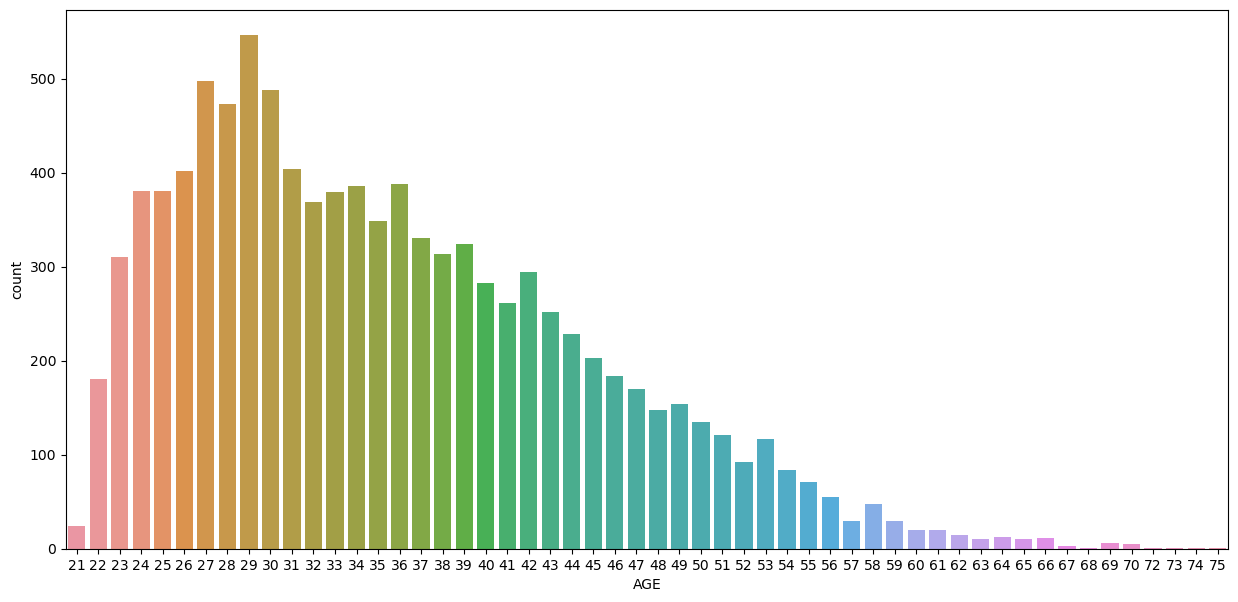

In [407]:
#plotting the count plot to vizualize the data distribution
plt.figure(figsize=(15,7))
sns.countplot(x = 'AGE', data = credit_df)
plt.show()

**From the above data analysis we can say that**
*  ***We can see more number of credit cards holder age are between 26-30 years old.***
*  ***Age above 60 years old rarely uses the credit card.***



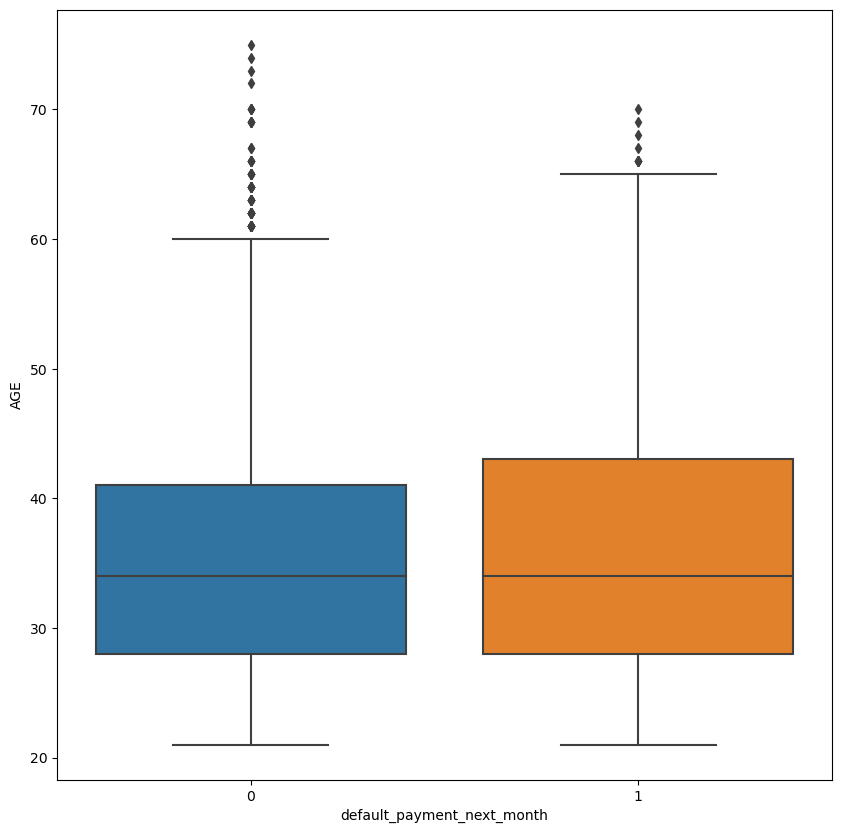

In [408]:
#plotting the box plot to vizualize the data distribution
plt.figure(figsize=(10,10))
ax = sns.boxplot(x="default_payment_next_month", y="AGE", data=credit_df)

## **Numerical features**


**What is Numerical Data**

* ***Numerical data is a data type expressed in numbers, rather than natural language description. Sometimes called quantitative data, numerical data is always collected in number form. Numerical data differentiates itself from other number form data types with its ability to carry out arithmetic operations with these numbers.***

### **Limit Balance**

In [409]:
# describe  the limit balance  data set
credit_df['CC_LIMIT'].describe()

count     10000.000000
mean     184810.972500
std      142715.991271
min       11025.000000
25%       55125.000000
50%      154350.000000
75%      264600.000000
max      882000.000000
Name: CC_LIMIT, dtype: float64

***Distribution of LIMIT_BAL.***

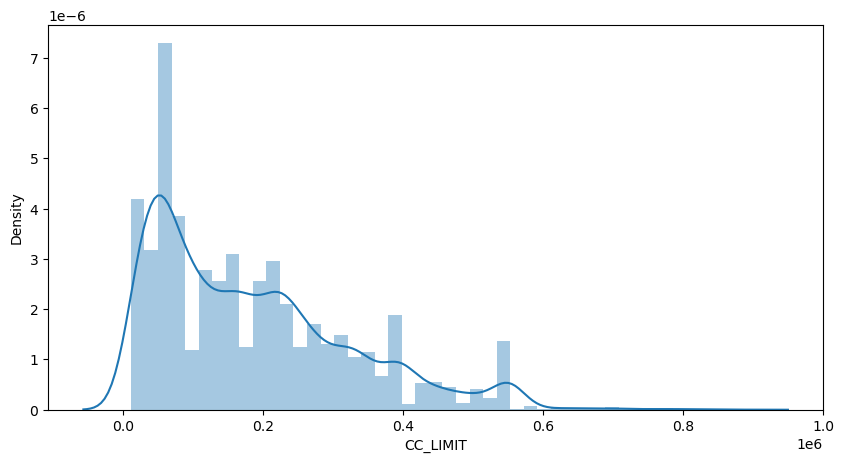

In [410]:
#plotting the dist plot to vizualize the data distribution
plt.figure(figsize=(10,5))
sns.distplot(credit_df['CC_LIMIT'], kde=True)
plt.show()

**From the above data analysis we can say that**
* ***Maximum amount of given credit  is 40,000 followed by 30,000 and 20,000.***

<Axes: xlabel='default_payment_next_month', ylabel='CC_LIMIT'>

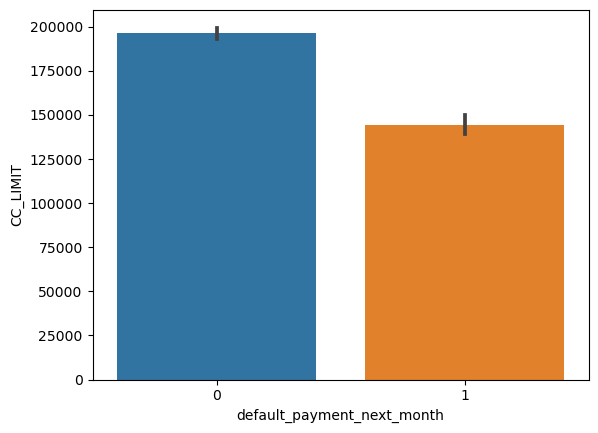

In [411]:
#plotting the bar plot to vizualize the data distribution
sns.barplot(x='default_payment_next_month', y='CC_LIMIT', data=credit_df)

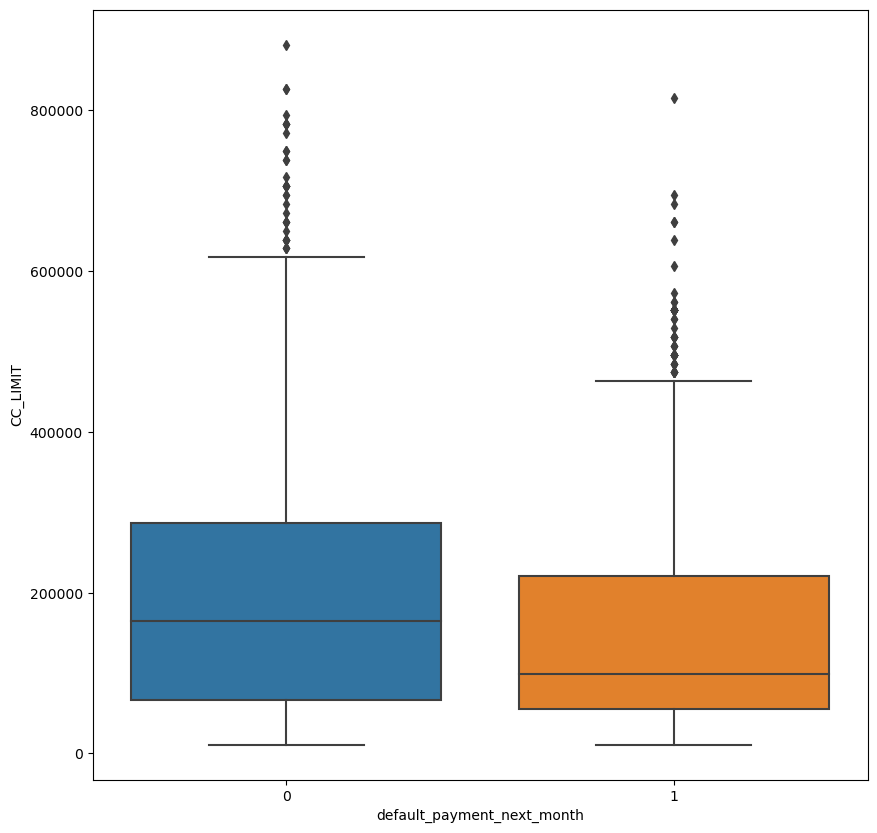

In [412]:
#plotting the box plot to vizualize the data distribution
plt.figure(figsize=(10,10))
ax = sns.boxplot(x="default_payment_next_month", y="CC_LIMIT", data=credit_df)

In [413]:
#check details about the data set
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   CUST_ID                     10000 non-null  int32
 1   AGE                         10000 non-null  int32
 2   SEX                         10000 non-null  int32
 3   EDUCATION                   10000 non-null  int32
 4   MARRIAGE                    10000 non-null  int32
 5   CC_LIMIT                    10000 non-null  int32
 6   APR_PAY                     10000 non-null  int32
 7   MAY_PAY                     10000 non-null  int32
 8   JUN_PAY                     10000 non-null  int32
 9   JUL_PAY                     10000 non-null  int32
 10  AUG_PAY                     10000 non-null  int32
 11  SEPT_PAY                    10000 non-null  int32
 12  APR_BILL                    10000 non-null  int32
 13  MAY_BILL                    10000 non-null  int32
 14  JUN_BIL

In [414]:
credit_df.head()

,CUST_ID,AGE,SEX,EDUCATION,MARRIAGE,CC_LIMIT,APR_PAY,MAY_PAY,JUN_PAY,JUL_PAY,...,JUL_BILL,AUG_BILL,SEPT_BILL,APR_PAID,MAY_PAID,JUN_PAID,JUL_PAID,AUG_PAID,SEPT_PAID,default_payment_next_month
0,18064,56,2,1,1,242550,-1,-1,-2,-2,...,0,0,0,181,330,6492,0,0,0,0
1,24524,36,2,1,1,110250,-2,-2,0,0,...,27862,57013,104512,0,0,0,0,1102,2892,0
2,40165,26,1,1,2,88200,0,0,0,0,...,76661,85817,85330,1653,2553,1671,1314,3099,3669,0
3,18744,28,2,1,2,264600,0,0,0,0,...,18416,32092,33265,4410,2756,0,3865,4410,5522,0
4,15813,36,1,2,2,55125,-2,-2,2,2,...,54463,56152,51499,0,0,0,2205,0,5512,0


# **Total Bill Amount**

### **Previous payment status**

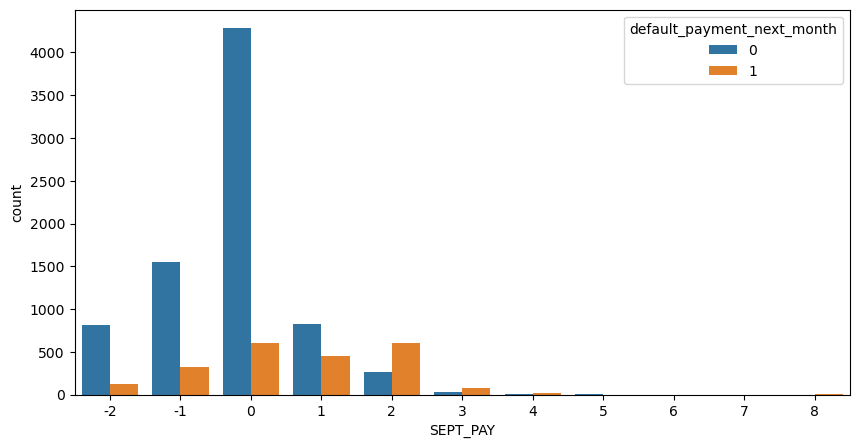

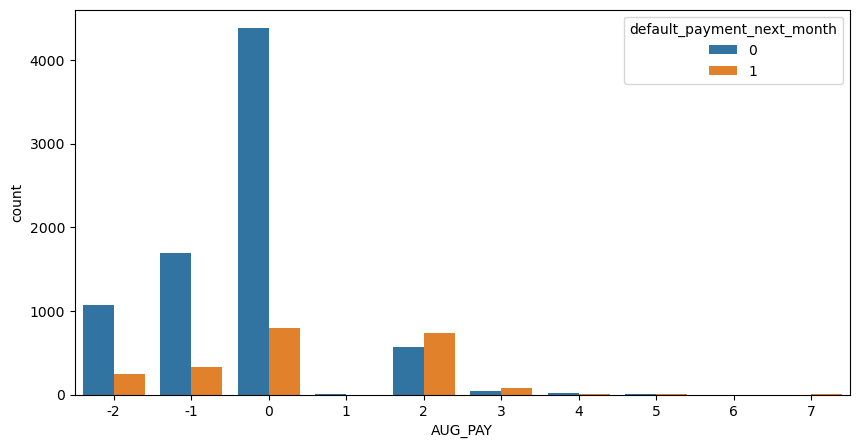

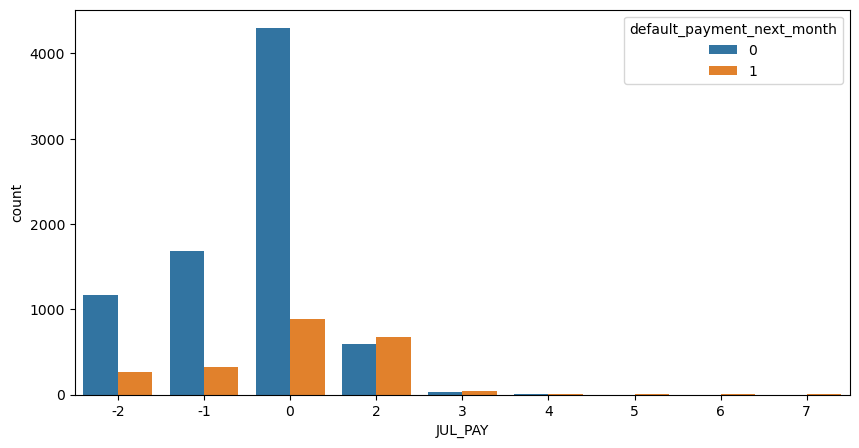

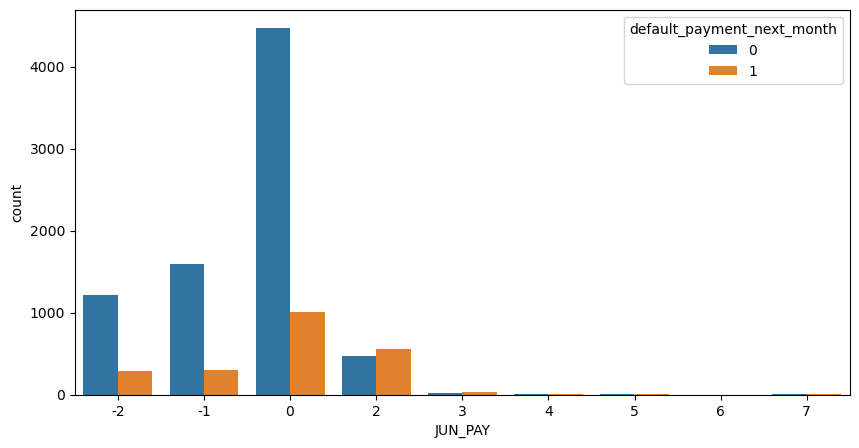

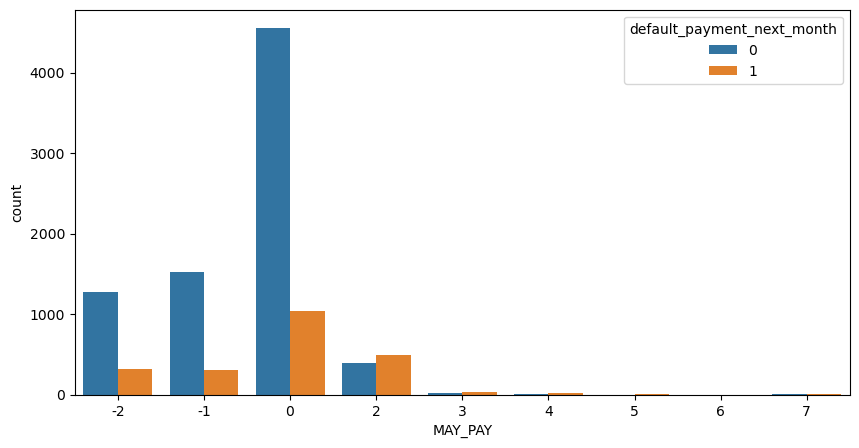

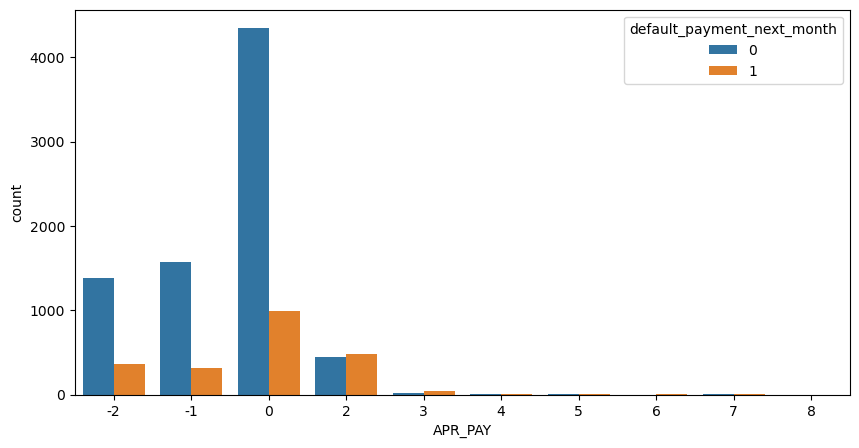

In [415]:
#plotting the count plot for Previous payment status
pre_payment = ['SEPT_PAY',	'AUG_PAY',	'JUL_PAY',	'JUN_PAY',	'MAY_PAY',	'APR_PAY']
for col in pre_payment:
  plt.figure(figsize=(10,5))
  sns.countplot(x = col, hue = 'default_payment_next_month', data = credit_df)

# **Paid Amount**

# **Bivariate Analysis**

**what is bivariate analysis**
* ***Bivariate analysis is one of the simplest forms of quantitative analysis. It involves the analysis of two variables, for the purpose of determining the empirical relationship between them. Bivariate analysis can be helpful in testing simple hypotheses of association***

###**Sex and default_payment_next_month**

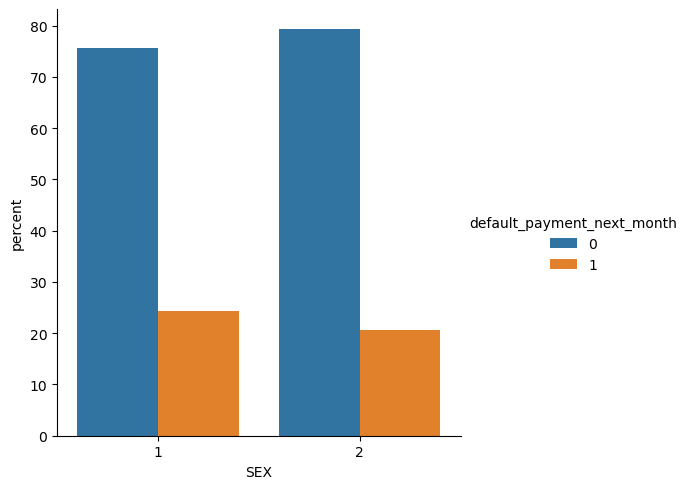

In [416]:
#plotting the cat plot to vizualize the data distribution related to the default_payment_next_month
x,y = 'SEX', 'default_payment_next_month'

(credit_df
.groupby(x)[y]
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index()
.pipe((sns.catplot,'data'), x=x,y='percent',hue=y,kind='bar'))

* ***It is evident from the above graph that the number of defaulter have high proportion of males.***

### **Education and default_payment_next_month**

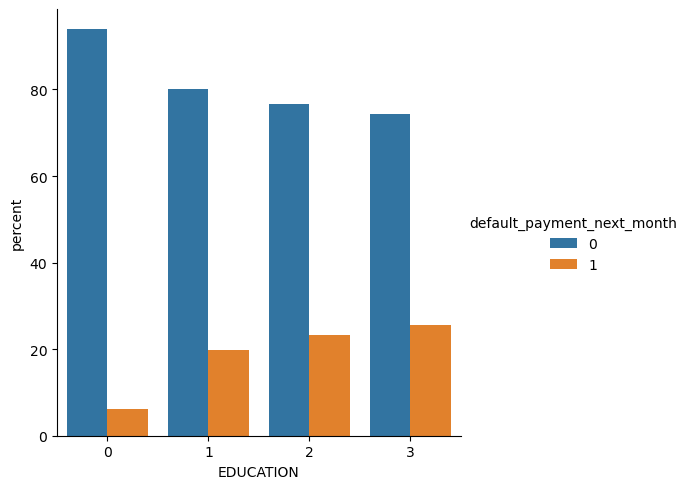

In [417]:
#plotting the cat plot to vizualize the data distribution related to the default_payment_next_month
x,y = 'EDUCATION', 'default_payment_next_month'

(credit_df
.groupby(x)[y]
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index()
.pipe((sns.catplot,'data'), x=x,y='percent',hue=y,kind='bar'))

* ***From the above plot it is clear that those people who are other students have higher default payment wrt graduates and university people***

###**Marriage and default_payment_next_month**

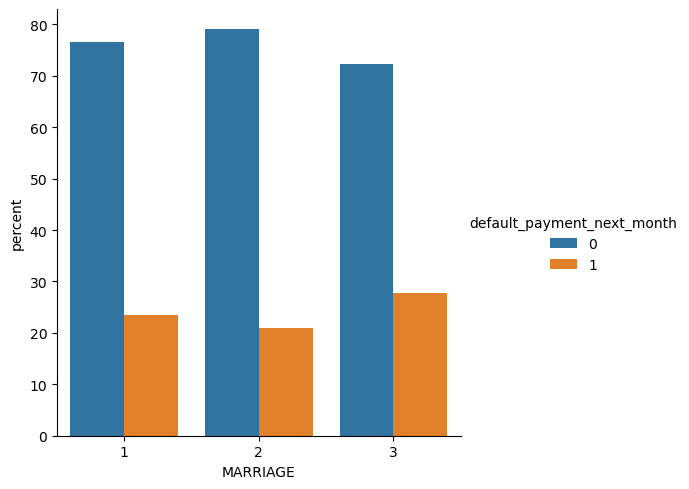

In [418]:
#plotting the cat plot to vizualize the data distribution related to the default_payment_next_month
x,y = 'MARRIAGE', 'default_payment_next_month'

(credit_df
.groupby(x)[y]
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index()
.pipe((sns.catplot,'data'), x=x,y='percent',hue=y,kind='bar'))

* ***High defaulter rate when it comes to others***

### **Age and default_payment_next_month**

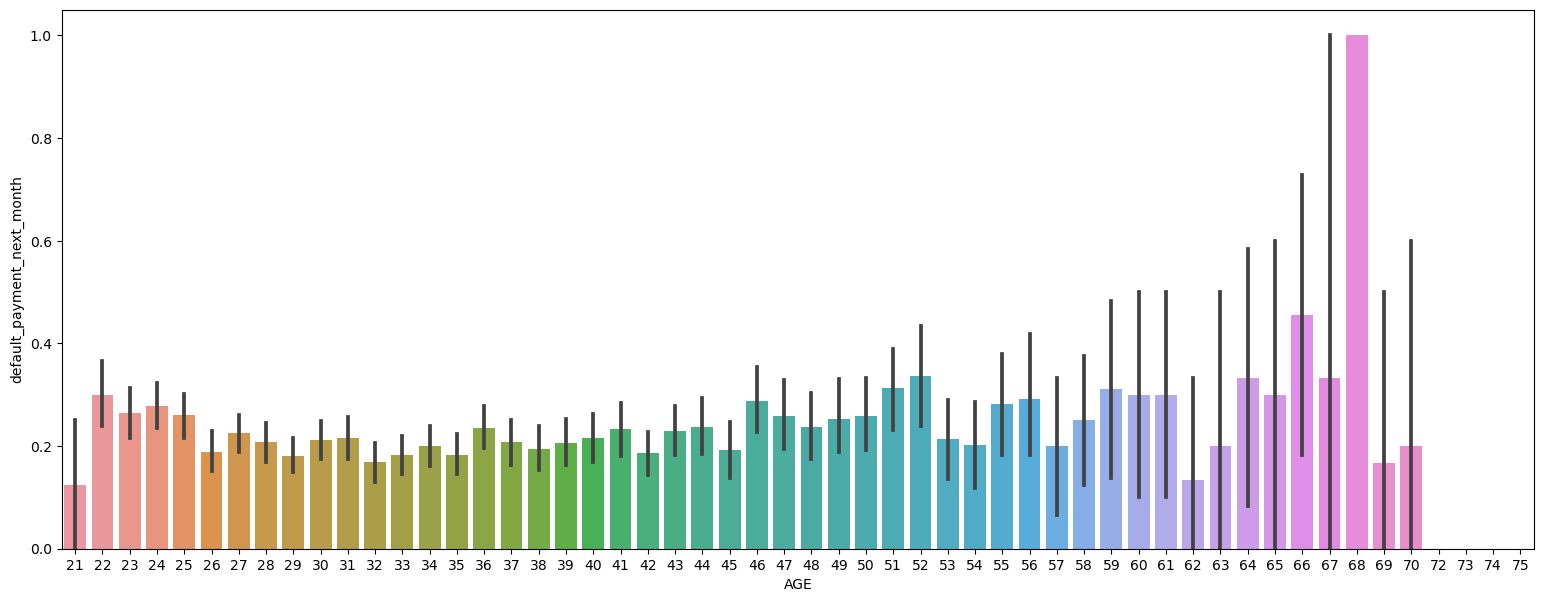

In [419]:
#plotting the bar plot to vizualize the data distribution related to the default_payment_next_month
plt.figure(figsize=(19,7))
sns.barplot(x = 'AGE', y = 'default_payment_next_month', data = credit_df)

plt.show()

* **Slightly higher defaulter rate in  60's**.




##**Checking of Correlation between variables**

* **we check correletion betweeen variables using Correlation heatmap, it is graphical representation of correlation matrix representing correlation between different variables**

<Axes: >

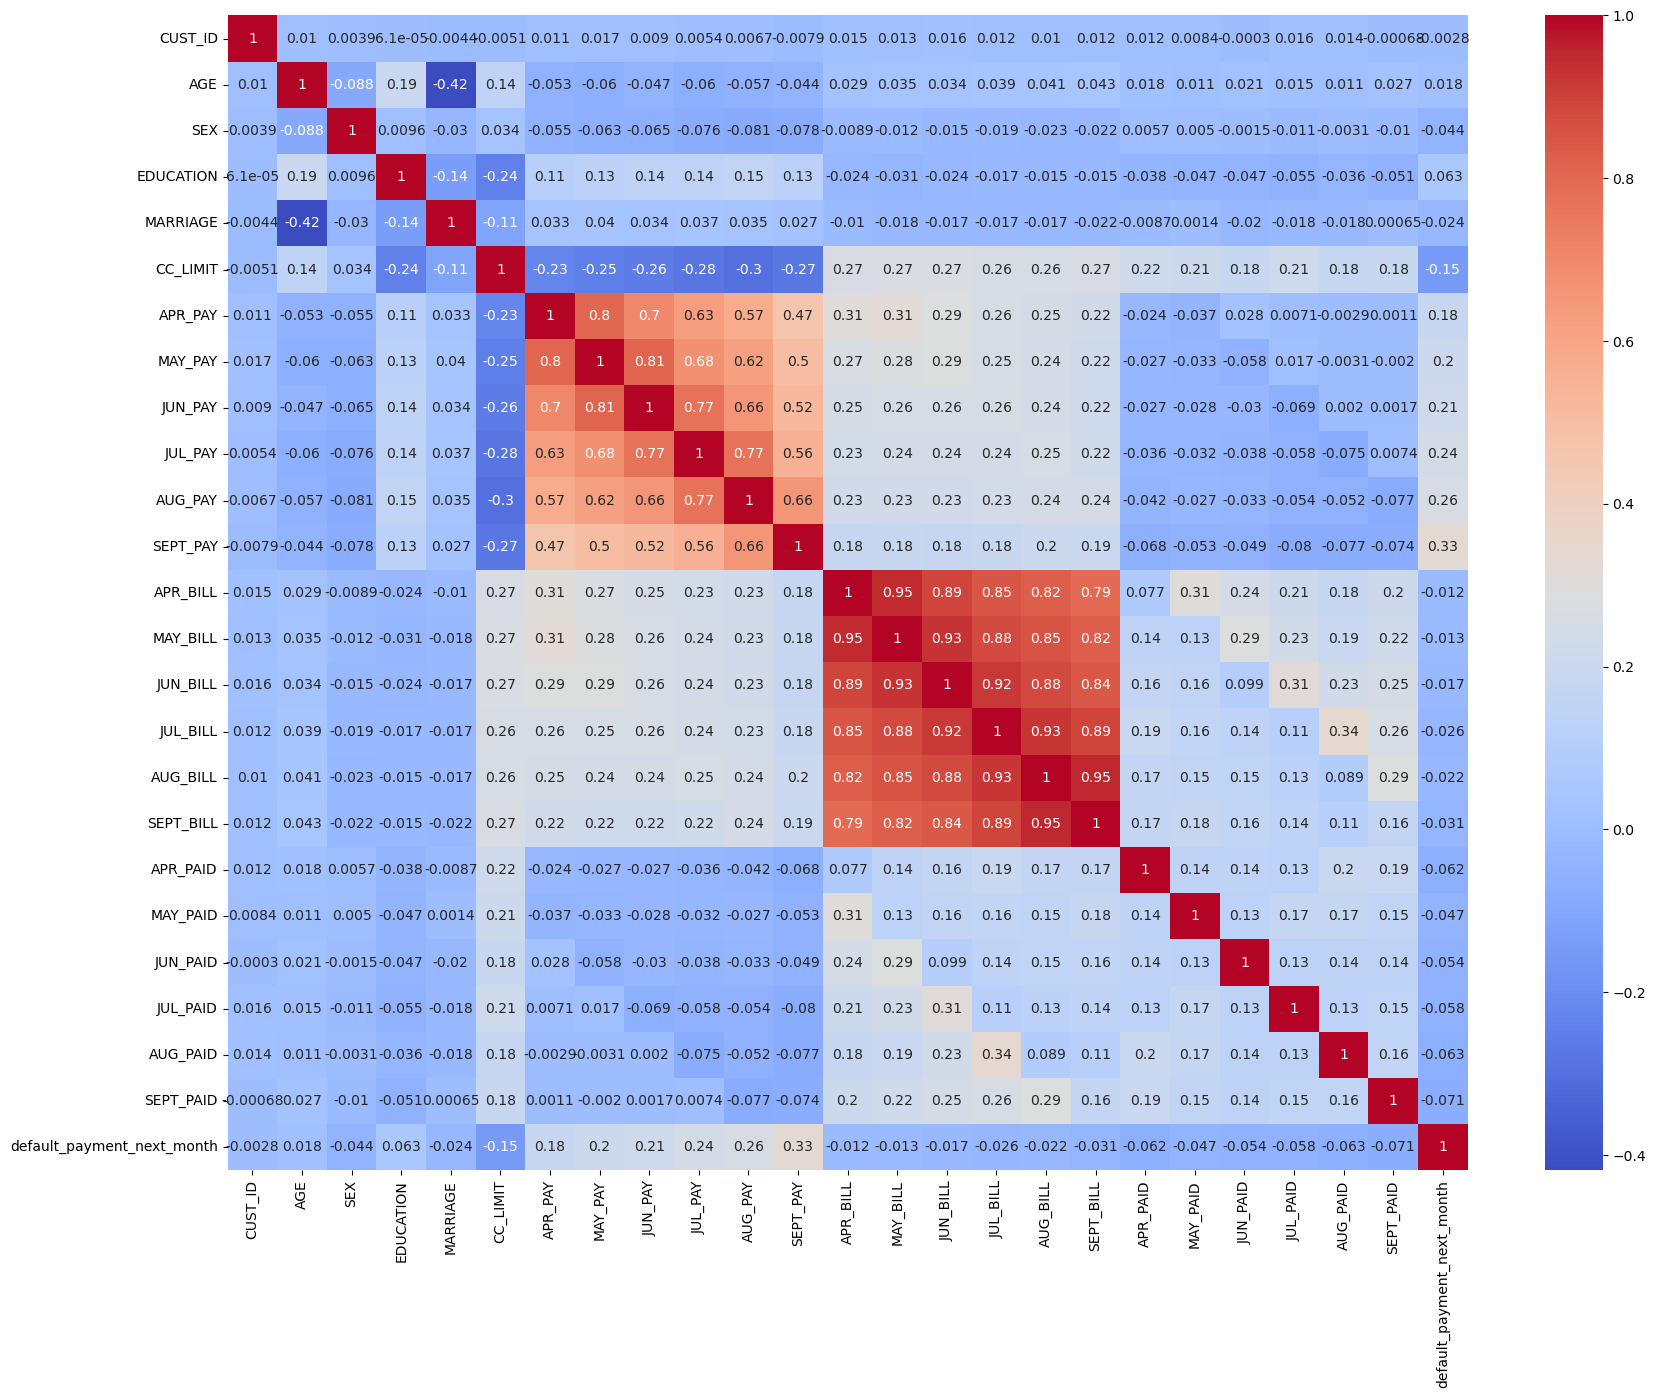

In [420]:
#plotting the heatmap
plt.figure(figsize=(20,15))
sns.heatmap(credit_df.corr(),annot=True,cmap="coolwarm")

* ***It seems from the above graph is there are some negatively correlated feature like age but we cannot blindly remove this feature because it could be important feature for prediction.***
* ***ID is unimportant and it has no role in prediction so we will remove it.***


# **SMOTE**

* ***In our data set we have  Imbalanced Data Distribution in our dependent variable, it  generally happens when observations in one of the class are much higher i.e not defaulter or lower than the other classes i.e defaulter.***

* ***As Machine Learning algorithms tend to increase accuracy by reducing the error, they do not consider the class distribution.***


***SMOTE***

* ***SMOTE (Synthetic Minority Oversampling Technique) – Oversampling is one of the most commonly used oversampling methods to solve the imbalance problem.
It aims to balance class distribution by randomly increasing minority class examples by replicating them.***


In [583]:
#import the module
from imblearn.over_sampling import SMOTE

smote = SMOTE()

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(credit_df.iloc[:,0:-1], credit_df['default_payment_next_month'])

print('Original dataset shape', len(credit_df))
print('Resampled dataset shape', len(y_smote))

Original dataset shape 10000
Resampled dataset shape 15562


In [584]:
x_smote

,CUST_ID,AGE,SEX,EDUCATION,MARRIAGE,CC_LIMIT,APR_PAY,MAY_PAY,JUN_PAY,JUL_PAY,...,JUN_BILL,JUL_BILL,AUG_BILL,SEPT_BILL,APR_PAID,MAY_PAID,JUN_PAID,JUL_PAID,AUG_PAID,SEPT_PAID
0,18064,56,2,1,1,242550,-1,-1,-2,-2,...,0,0,0,0,181,330,6492,0,0,0
1,24524,36,2,1,1,110250,-2,-2,0,0,...,0,27862,57013,104512,0,0,0,0,1102,2892
2,40165,26,1,1,2,88200,0,0,0,0,...,66973,76661,85817,85330,1653,2553,1671,1314,3099,3669
3,18744,28,2,1,2,264600,0,0,0,0,...,15362,18416,32092,33265,4410,2756,0,3865,4410,5522
4,15813,36,1,2,2,55125,-2,-2,2,2,...,0,54463,56152,51499,0,0,0,2205,0,5512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15557,18553,27,1,2,2,33075,2,2,2,2,...,17166,15425,15903,16295,92,1420,92,2340,92,184
15558,48602,42,2,2,1,33075,0,0,0,0,...,18845,22996,31746,32573,755,808,678,1671,1951,1647
15559,22083,36,1,2,1,325711,0,0,0,1,...,3499,6074,7075,1378,11436,81447,3071,419,252,10773
15560,18764,47,1,1,1,133415,1,1,0,0,...,100426,94135,91304,90373,3941,3929,3926,7878,4309,3310


In [588]:
columns = list(credit_df.columns)

In [424]:
columns.pop()

'default_payment_next_month'

In [425]:
balance_df = pd.DataFrame(x_smote, columns=columns)

In [426]:
balance_df['default_payment_next_month'] = y_smote

In [427]:
balance_df[balance_df['default_payment_next_month']==1]

,CUST_ID,AGE,SEX,EDUCATION,MARRIAGE,CC_LIMIT,APR_PAY,MAY_PAY,JUN_PAY,JUL_PAY,...,JUL_BILL,AUG_BILL,SEPT_BILL,APR_PAID,MAY_PAID,JUN_PAID,JUL_PAID,AUG_PAID,SEPT_PAID,default_payment_next_month
7,17466,30,1,3,2,88200,0,0,0,0,...,6588,86006,87790,140,162,169,1168,1219,1864,1
9,25320,37,1,3,1,308700,0,0,0,0,...,309004,304256,299081,5513,6777,6621,6621,11517,18732,1
22,23830,27,2,2,2,99225,0,0,0,-1,...,4907,563,561,0,119,5690,90,4907,563,1
23,24782,43,1,3,1,264600,2,2,2,2,...,2756,2756,2965,0,0,0,0,0,2756,1
27,19343,24,1,2,2,22050,0,0,2,2,...,22771,22721,18958,882,2205,1102,0,771,4417,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15557,20284,45,2,2,2,55125,0,0,0,0,...,37380,39836,40144,1688,1229,1102,3182,1846,1906,1
15558,45552,31,1,2,2,111200,1,2,0,0,...,46727,43739,41757,6196,152,2014,3606,3715,2698,1
15559,37896,28,2,2,1,198450,0,0,0,0,...,9650,7309,5702,3893,23386,3672,2452,4057,3996,1
15560,27937,38,1,2,1,264600,-1,-1,-1,-1,...,511,511,550,0,0,0,0,0,511,1


0    7781
1    2219
Name: default_payment_next_month, dtype: int64

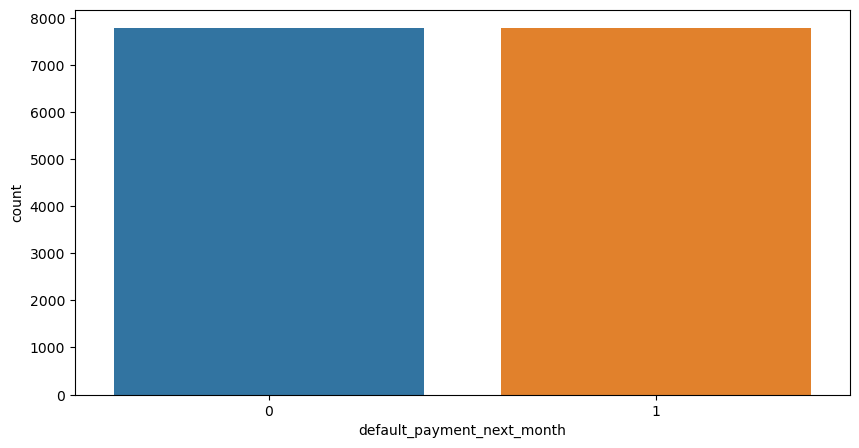

In [589]:
plt.figure(figsize=(10,5))
sns.countplot(x = 'default_payment_next_month', data = balance_df)
credit_df['default_payment_next_month'].value_counts()

# **Feature Engineering**

In [428]:
#save a copy file in other variable
credit_df_copy = balance_df.copy()

In [429]:
#assign the the sum of payment value in one
credit_df_copy['total_Payement_Value'] = credit_df_copy['SEPT_PAY']+ credit_df_copy['AUG_PAY'] + credit_df_copy['JUL_PAY'] + credit_df_copy['JUN_PAY'] + credit_df_copy['MAY_PAY'] + credit_df_copy['APR_PAY']

In [430]:
#check the correlation by using mean
credit_df_copy.groupby('default_payment_next_month')['total_Payement_Value'].mean()

default_payment_next_month
0   -2.078653
1    1.540162
Name: total_Payement_Value, dtype: float64

<Axes: xlabel='default_payment_next_month', ylabel='total_Payement_Value'>

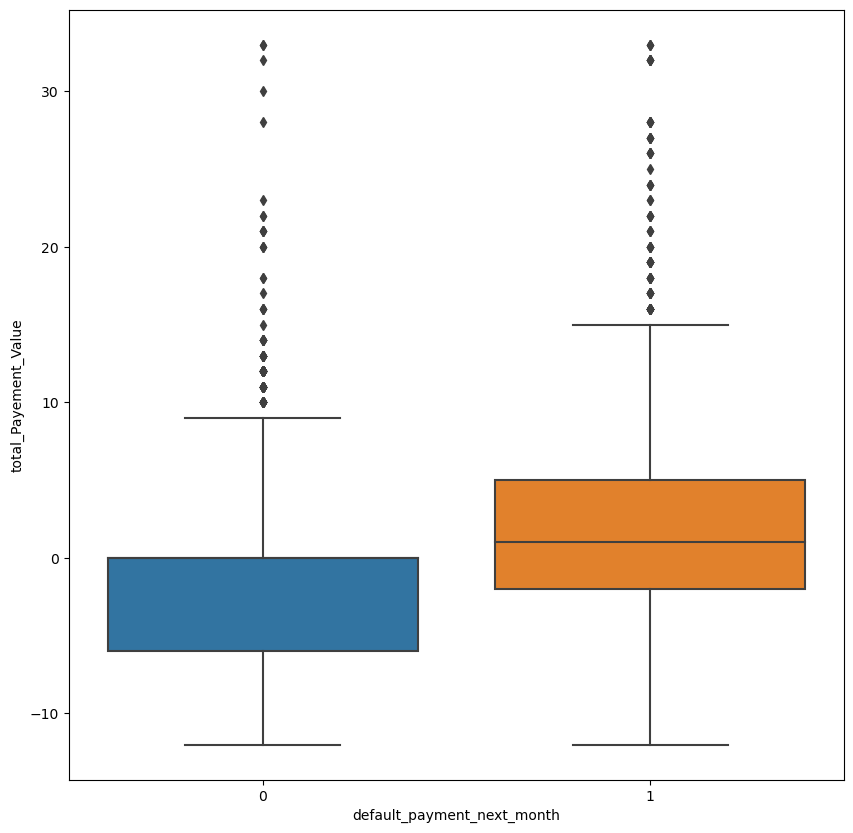

In [431]:
#plotting the box plot
plt.figure(figsize=(10,10))
sns.boxplot(data = credit_df_copy, x = 'default_payment_next_month', y = 'total_Payement_Value' )

In [432]:
#create a new column due by calculating the sum of total bill ammount substract it from the total amont paid
credit_df_copy['Dues'] = (credit_df_copy['APR_BILL']+credit_df_copy['MAY_BILL']+credit_df_copy['JUN_BILL']+credit_df_copy['JUL_BILL']+credit_df_copy['SEPT_BILL'])-(credit_df_copy['APR_PAY']+credit_df_copy['MAY_PAY']+credit_df_copy['JUN_PAY']+credit_df_copy['JUL_PAY']+credit_df_copy['AUG_PAY']+credit_df_copy['SEPT_PAY'])

In [433]:
#check the mean to calculate the correletion
credit_df_copy.groupby('default_payment_next_month')['Dues'].mean()

default_payment_next_month
0    239364.597995
1    219035.498522
Name: Dues, dtype: float64

In [434]:
credit_df_copy.replace({'SEX': {1 : 'MALE', 2 : 'FEMALE'},
                        'EDUCATION' : {1 : 'graduate school', 2 : 'university', 3 : 'high school', 0 : 'others'},
                        'MARRIAGE' : {1 : 'married', 2 : 'single', 3 : 'others'}}, inplace = True)

In [435]:
#final data set
credit_df_copy.head()

,CUST_ID,AGE,SEX,EDUCATION,MARRIAGE,CC_LIMIT,APR_PAY,MAY_PAY,JUN_PAY,JUL_PAY,...,SEPT_BILL,APR_PAID,MAY_PAID,JUN_PAID,JUL_PAID,AUG_PAID,SEPT_PAID,default_payment_next_month,total_Payement_Value,Dues
0,18064,56,FEMALE,graduate school,married,242550,-1,-1,-2,-2,...,0,181,330,6492,0,0,0,0,-7,6829
1,24524,36,FEMALE,graduate school,married,110250,-2,-2,0,0,...,104512,0,0,0,0,1102,2892,0,-2,132376
2,40165,26,MALE,graduate school,single,88200,0,0,0,0,...,85330,1653,2553,1671,1314,3099,3669,0,0,334517
3,18744,28,FEMALE,graduate school,single,264600,0,0,0,0,...,33265,4410,2756,0,3865,4410,5522,0,0,74253
4,15813,36,MALE,university,single,55125,-2,-2,2,2,...,51499,0,0,0,2205,0,5512,0,0,105962


# **One Hot Encoding**

* ***One hot encoding is a process by which categorical variables are converted into a form that could be provided to ML algorithms to do a better job in prediction.***
* ***here we perform one hot encoding on 'EDUCATION','MARRIAGE','PAY_SEPT',	'PAY_AUG',	'PAY_JUL',	'PAY_JUN',	'PAY_MAY',	'PAY_APR'***

In [436]:
#get dummies
credit_df_copy = pd.get_dummies(credit_df_copy,columns=['EDUCATION','MARRIAGE'])

In [437]:
#get dummies
credit_df_copy = pd.get_dummies(credit_df_copy, columns = ['SEPT_PAY',	'AUG_PAY',	'JUL_PAY',	'JUN_PAY',	'MAY_PAY',	'APR_PAY'], drop_first = True )

In [438]:
# LABEL ENCODING FOR SEX
encoders_nums = {
                 "SEX":{"FEMALE": 0, "MALE": 1}
}
credit_df_copy = credit_df_copy.replace(encoders_nums)

In [439]:
credit_df_copy.drop('CUST_ID',axis = 1, inplace = True)

In [440]:
credit_df_copy.columns

Index(['AGE', 'SEX', 'CC_LIMIT', 'APR_BILL', 'MAY_BILL', 'JUN_BILL',
       'JUL_BILL', 'AUG_BILL', 'SEPT_BILL', 'APR_PAID', 'MAY_PAID', 'JUN_PAID',
       'JUL_PAID', 'AUG_PAID', 'SEPT_PAID', 'default_payment_next_month',
       'total_Payement_Value', 'Dues', 'EDUCATION_graduate school',
       'EDUCATION_high school', 'EDUCATION_others', 'EDUCATION_university',
       'MARRIAGE_married', 'MARRIAGE_others', 'MARRIAGE_single', 'SEPT_PAY_-1',
       'SEPT_PAY_0', 'SEPT_PAY_1', 'SEPT_PAY_2', 'SEPT_PAY_3', 'SEPT_PAY_4',
       'SEPT_PAY_5', 'SEPT_PAY_6', 'SEPT_PAY_7', 'SEPT_PAY_8', 'AUG_PAY_-1',
       'AUG_PAY_0', 'AUG_PAY_1', 'AUG_PAY_2', 'AUG_PAY_3', 'AUG_PAY_4',
       'AUG_PAY_5', 'AUG_PAY_6', 'AUG_PAY_7', 'JUL_PAY_-1', 'JUL_PAY_0',
       'JUL_PAY_1', 'JUL_PAY_2', 'JUL_PAY_3', 'JUL_PAY_4', 'JUL_PAY_5',
       'JUL_PAY_6', 'JUL_PAY_7', 'JUN_PAY_-1', 'JUN_PAY_0', 'JUN_PAY_1',
       'JUN_PAY_2', 'JUN_PAY_3', 'JUN_PAY_4', 'JUN_PAY_5', 'JUN_PAY_6',
       'JUN_PAY_7', 'MAY_PAY_-1', 'MA

In [441]:
credit_df_copy.shape

(15562, 81)

In [442]:
credit_df_copy.head()

,AGE,SEX,CC_LIMIT,APR_BILL,MAY_BILL,JUN_BILL,JUL_BILL,AUG_BILL,SEPT_BILL,APR_PAID,...,APR_PAY_-1,APR_PAY_0,APR_PAY_1,APR_PAY_2,APR_PAY_3,APR_PAY_4,APR_PAY_5,APR_PAY_6,APR_PAY_7,APR_PAY_8
0,56,0,242550,330,6492,0,0,0,0,181,...,1,0,0,0,0,0,0,0,0,0
1,36,0,110250,0,0,0,27862,57013,104512,0,...,0,0,0,0,0,0,0,0,0,0
2,26,1,88200,47915,57638,66973,76661,85817,85330,1653,...,0,1,0,0,0,0,0,0,0,0
3,28,0,264600,4983,2227,15362,18416,32092,33265,4410,...,0,1,0,0,0,0,0,0,0,0
4,36,1,55125,0,0,0,54463,56152,51499,0,...,0,0,0,0,0,0,0,0,0,0


#**Modeling**

## **Performance Metrics**
* **Precision** is a good metric to use when the costs of **false positive(FP)** is high.

  **Precision = TP / (TP + FP)**

* **Recall** is a good metric to use when the cost associated with **false negative(FN)** is high.

  **Recall = TP / (TP + FN)**

* **F1-score** is a weighted average of **precision** and **recall**. Thus, it considers **FP** and **FN.** This metric is very useful when we have uneven class distribution, as it seeks a balance between **precision** and **recall.**

  **F1-score = 2 * (precision * recall) / (precision + recall)**

## **Note**
* In this classification problem there is a high cost for the bank when a default credit card is predicted as non-default, since no actions can be taken. Thus, we will give **recall** more importance .

## **Import Packages for performing models**

In [443]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, auc

from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import precision_recall_curve


# **Implementing Logistic Regression**

L*ogistic Regression is one of the simplest algorithms which estimates the relationship between one dependent binary variable and independent variables, computing the probability of occurrence of an event. The regulation parameter C controls the trade-off between increasing complexity (overfitting) and keeping the model simple (underfitting). For large values of C, the power of regulation is reduced and the model increases its complexity, thus overfitting the data.*

In [444]:
#make a copy
credit_df_logistic = credit_df_copy.copy()

In [445]:
#show the first 5 column
credit_df_logistic.head()

,AGE,SEX,CC_LIMIT,APR_BILL,MAY_BILL,JUN_BILL,JUL_BILL,AUG_BILL,SEPT_BILL,APR_PAID,...,APR_PAY_-1,APR_PAY_0,APR_PAY_1,APR_PAY_2,APR_PAY_3,APR_PAY_4,APR_PAY_5,APR_PAY_6,APR_PAY_7,APR_PAY_8
0,56,0,242550,330,6492,0,0,0,0,181,...,1,0,0,0,0,0,0,0,0,0
1,36,0,110250,0,0,0,27862,57013,104512,0,...,0,0,0,0,0,0,0,0,0,0
2,26,1,88200,47915,57638,66973,76661,85817,85330,1653,...,0,1,0,0,0,0,0,0,0,0
3,28,0,264600,4983,2227,15362,18416,32092,33265,4410,...,0,1,0,0,0,0,0,0,0,0
4,36,1,55125,0,0,0,54463,56152,51499,0,...,0,0,0,0,0,0,0,0,0,0


##train test split data set

In [530]:
#define the X and y value
X = credit_df_logistic.drop(['default_payment_next_month','total_Payement_Value','Dues'],axis=1)
y = credit_df_logistic['default_payment_next_month']
Train=X.copy()

In [531]:
columns = X.columns

In [582]:
#standardise the x value by using satandardscaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [526]:
#split the data set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify = y)


**What is GridSearchCV?**
* ***GridSearchCV is a library function that is a member of sklearn's model_selection package. It helps to loop through predefined hyperparameters and fit our estimator (model) on your training set. So, in the end, we can select the best parameters from the listed hyperparameters***.

In [450]:
#set the parmeter
param_grid = {'penalty':['l1','l2'], 'C' : [0.001, 0.01, 0.1, 1, 10, 100, 1000] }

In [451]:
#fit the parameter
grid_lr_clf = GridSearchCV(LogisticRegression(), param_grid, scoring = 'accuracy', n_jobs = -1, verbose = 3, cv = 3)
grid_lr_clf.fit(X_train, y_train)

Fitting 3 folds for each of 14 candidates, totalling 42 fits


GridSearchCV(cv=3, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2']},
             scoring='accuracy', verbose=3)

In [452]:
optimized_clf = grid_lr_clf.best_estimator_

In [453]:
grid_lr_clf.best_params_

{'C': 10, 'penalty': 'l2'}

In [454]:
grid_lr_clf.best_score_

0.749568372919616

In [455]:
# Predicted Probability
train_preds = optimized_clf.predict_proba(X_train)[:,1]
test_preds = optimized_clf.predict_proba(X_test)[:,1]

In [456]:
# Get the predicted classes
train_class_preds = optimized_clf.predict(X_train)
test_class_preds = optimized_clf.predict(X_test)

## Model Evaluation

In [457]:
# Get the accuracy scores
train_accuracy_lr = accuracy_score(train_class_preds,y_train)
test_accuracy_lr = accuracy_score(test_class_preds,y_test)

print("The accuracy on train data is ", train_accuracy_lr)
print("The accuracy on test data is ", test_accuracy_lr)

The accuracy on train data is  0.7558987147515825
The accuracy on test data is  0.7556464174454829


In [458]:
#print the accuracy,precission,recall,f1,roc_score
test_accuracy_lr = accuracy_score(test_class_preds,y_test)
test_precision_score_lr = precision_score(test_class_preds,y_test)
test_recall_score_lr = recall_score(test_class_preds,y_test)
test_f1_score_lr = f1_score(test_class_preds,y_test)
test_roc_score_lr = roc_auc_score(test_class_preds,y_test)

print("The accuracy on test data is ", test_accuracy_lr)
print("The precision on test data is ", test_precision_score_lr)
print("The recall on test data is ", test_recall_score_lr)
print("The f1 on test data is ", test_f1_score_lr)
print("The roc_score on test data is ", test_roc_score_lr)

The accuracy on test data is  0.7556464174454829
The precision on test data is  0.6861370716510904
The recall on test data is  0.7969244685662596
The f1 on test data is  0.73739275999163
The roc_score on test data is  0.7606844565053521


**from the above evalution we get the results as below**
* The accuracy on test data is  **0.7515576323987538**
* The precision on test data is **0.6779595015576324**
* The recall on test data is **0.7949771689497717**
* The f1 on test data is **0.7318200924758302**
* The roc_score on test data is  **0.7571287745631411**


**We have implemented logistic regression and we getting f1-sore approx 73%. As we have imbalanced dataset, F1- score is better parameter. Let's go ahead with other models and see if they can yield better result.**

## Confusion Matrix

**Confusion Matrix is a performance measurement for machine learning classification problem where output can be two or more classes. It is a table with 4 different combinations of predicted and actual values.**


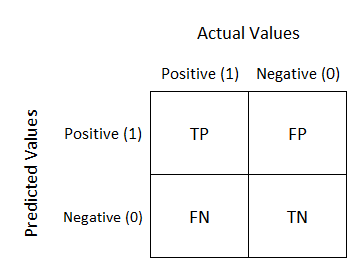

In [459]:
# Get the confusion matrix for both train and test
cm_lr = confusion_matrix(y_train, train_class_preds)
print(cm_lr)

[[4263  950]
 [1595 3618]]


[Text(0, 0.5, 'Not Defaulter'), Text(0, 1.5, 'Defaulter')]

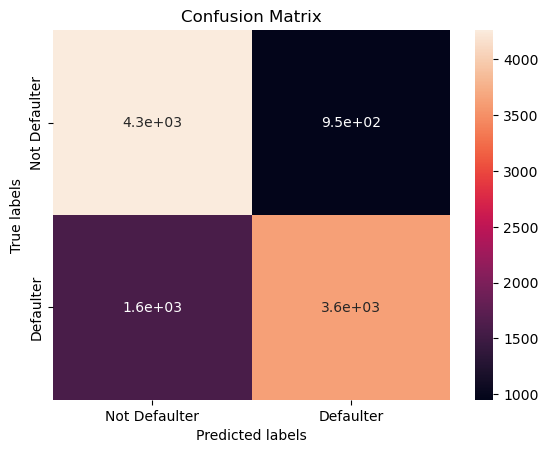

In [460]:
labels = ['Not Defaulter', 'Defaulter']
ax= plt.subplot()
sns.heatmap(cm_lr, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

## ROC AUC curve

**An ROC curve (receiver operating characteristic curve) is a graph showing the performance of a classification model at all classification thresholds. This curve plots two parameters:**

* True Positive Rate

* False Positive Rate

**AUC stands for "Area under the ROC Curve." That is, AUC measures the entire two-dimensional area underneath the entire ROC curve**

In [461]:
y_preds_proba_lr = optimized_clf.predict_proba(X_test)[::,1]

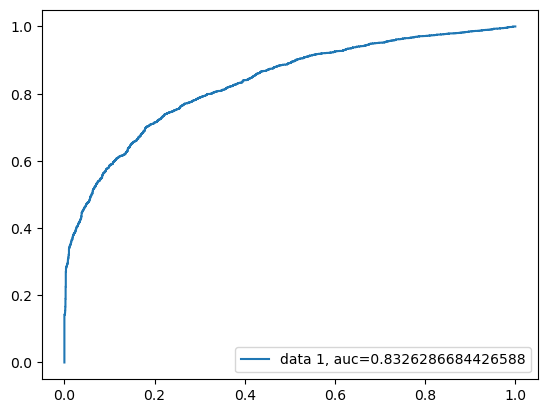

In [462]:
#plot the graph
y_pred_proba = y_preds_proba_lr
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# Implementing RandomForest

In [463]:
#import the packages
from sklearn.ensemble import RandomForestClassifier

In [464]:
#define the X and y value
X = credit_df_copy.drop(['default_payment_next_month','total_Payement_Value','Dues'],axis=1)
y = credit_df_copy['default_payment_next_month']

In [465]:
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train,y_train)

RandomForestClassifier()

In [466]:
# Get the predicted classes
train_class_preds = rf_clf.predict(X_train)
test_class_preds = rf_clf.predict(X_test)

In [467]:
#Model Evaluation
# Get the accuracy scores
train_accuracy_rf = accuracy_score(train_class_preds,y_train)
test_accuracy_rf = accuracy_score(test_class_preds,y_test)

In [468]:
print("The accuracy on train data is ", train_accuracy_rf)
print("The accuracy on test data is ", test_accuracy_rf)
test_accuracy_rf = accuracy_score(test_class_preds,y_test)
test_precision_score_rf = precision_score(test_class_preds,y_test)
test_recall_score_rf = recall_score(test_class_preds,y_test)
test_f1_score_rf = f1_score(test_class_preds,y_test)
test_roc_score_rf = roc_auc_score(test_class_preds,y_test)

The accuracy on train data is  0.9999040859389987
The accuracy on test data is  0.8343068535825545


In [469]:
print("The accuracy on test data is ", test_accuracy_rf)
print("The precision on test data is ", test_precision_score_rf)
print("The recall on test data is ", test_recall_score_rf)
print("The f1 on test data is ", test_f1_score_rf)
print("The roc_score on test data is ", test_roc_score_rf)

The accuracy on test data is  0.8343068535825545
The precision on test data is  0.7998442367601246
The recall on test data is  0.8590547887913007
The f1 on test data is  0.828392821133293
The roc_score on test data is  0.8359026220823534



# from the above evalution we get the results as below

* The accuracy on test data is 0.8325545171339563**
* The precision on test data is 0.8041277258566978**
* The recall on test data is 0.8526011560693642**
* The f1 on test data is 0.8276553106212425**
* The roc_score on test data is 0.8336329288084476**
* We can see from above results that we are getting around 99% train accuracy and 83% for test accuracy which depicts that model is overfitting. However our f1-score is around 82%, which is not bad.**

In [595]:
#set the parmeter
param_grid = {'n_estimators': [100,150,200], 'max_depth': [10,20,30]}
#fit the parameter
grid_rf_clf = GridSearchCV(RandomForestClassifier(), param_grid, scoring = 'accuracy', n_jobs = -1, verbose = 3, cv = 3)
grid_rf_clf.fit(X_train, y_train)
grid_rf_clf.best_score_
grid_rf_clf.best_params_
optimal_rf_clf = grid_rf_clf.best_estimator_


Fitting 3 folds for each of 9 candidates, totalling 27 fits


In [596]:
grid_rf_clf.best_params_

{'max_depth': 30, 'n_estimators': 200}

In [471]:
# Get the predicted classes
train_class_preds = optimal_rf_clf.predict(X_train)
test_class_preds = optimal_rf_clf.predict(X_test)

In [472]:
# Get the accuracy scores
train_accuracy_rf = accuracy_score(train_class_preds,y_train)
test_accuracy_rf = accuracy_score(test_class_preds,y_test)

In [473]:
print("The accuracy on train data is ", train_accuracy_rf)
print("The accuracy on test data is ", test_accuracy_rf)
test_accuracy_rf = accuracy_score(test_class_preds,y_test)
test_precision_score_rf = precision_score(test_class_preds,y_test)
test_recall_score_rf = recall_score(test_class_preds,y_test)
test_f1_score_rf = f1_score(test_class_preds,y_test)
test_roc_score_rf = roc_auc_score(test_class_preds,y_test)


The accuracy on train data is  0.9999040859389987
The accuracy on test data is  0.8403426791277259


In [474]:
print("The accuracy on test data is ", test_accuracy_rf)
print("The precision on test data is ", test_precision_score_rf)
print("The recall on test data is ", test_recall_score_rf)
print("The f1 on test data is ", test_f1_score_rf)
print("The roc_score on test data is ", test_roc_score_rf)

The accuracy on test data is  0.8403426791277259
The precision on test data is  0.8111370716510904
The recall on test data is  0.8614557485525227
The f1 on test data is  0.8355395106297633
The roc_score on test data is  0.8415078595595578


From the above evalution we get the results as below


* The accuracy on test data is 0.8368380062305296**
* The precision on test data is 0.8020752269779508
* The recall on test data is 0.8574380165289256**
* The f1 on test data is 0.8319967923015236 **
* The roc_score on test data is 0.8379605399286748**
* After gridsearch we getting f1-sore approx 82%. As we have imbalanced dataset, F1- score is better parameter. Let's go ahead with other models and see if they can yield better result.**

# Confusion Matrix

Confusion Matrix is a performance measurement for machine learning classification problem where output can be two or more classes. It is a table with 4 different combinations of predicted and actual values.

[[5213    0]
 [   1 5212]]


[Text(0, 0.5, 'Not Defaulter'), Text(0, 1.5, 'Defaulter')]

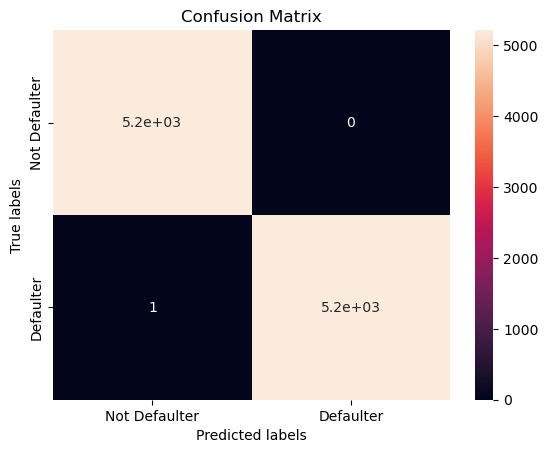

In [475]:
# Get the confusion matrix for both train and test
cm_rf = confusion_matrix(y_train, train_class_preds)
print(cm_rf)
labels = ['Not Defaulter', 'Defaulter']
ax= plt.subplot()
sns.heatmap(cm_rf, annot=True, ax = ax) #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

## ROC AUC curve

In [476]:
# Get the predicted classes
train_class_preds = optimal_rf_clf.predict(X_train)
test_class_preds = optimal_rf_clf.predict(X_test)

In [477]:
y_preds_proba_rf = optimal_rf_clf.predict_proba(X_test)[::,1]

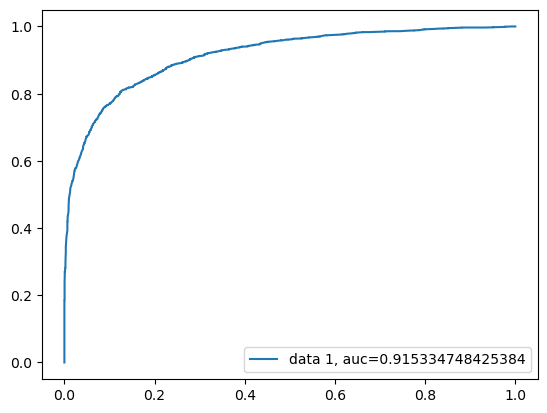

In [478]:
import sklearn.metrics as metrics
y_pred_proba = y_preds_proba_rf
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# IMPLEMENTING SVM

In [479]:
credit_df_svc = credit_df_copy.copy()

In [480]:
from sklearn import svm

In [481]:
#define the X and y value
X = credit_df_svc.drop(['default_payment_next_month','total_Payement_Value','Dues'],axis=1)
y = credit_df_svc['default_payment_next_month']

In [482]:
#standardise the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [483]:
#split the data set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify = y)

In [484]:
clf=svm.SVC(kernel='rbf',probability=True)

In [485]:
clf.fit(X_train,y_train)

SVC(probability=True)

In [486]:
y_hat=clf.predict(X_test)
# Get the predicted classes
train_class_preds_svm = clf.predict(X_train)


In [487]:
from sklearn.metrics import classification_report,confusion_matrix,f1_score

In [488]:
import itertools

In [489]:
train_accuracy_svm = accuracy_score(train_class_preds_svm,y_train)
test_accuracy_svm = accuracy_score(y_hat,y_test)

In [490]:
print("The accuracy on train data is ", train_accuracy_svm)
print("The accuracy on test data is ", test_accuracy_svm)

The accuracy on train data is  0.7910991751390754
The accuracy on test data is  0.7762850467289719


In [491]:
test_accuracy_svm = accuracy_score(y_hat,y_test)
test_precision_score_svm = precision_score(y_hat,y_test)
test_recall_score_svm= recall_score(y_hat,y_test)
test_f1_score_svm = f1_score(y_hat,y_test)
test_roc_score_svm = roc_auc_score(y_hat,y_test)

print("The accuracy on test data is ", test_accuracy_svm)
print("The precision on test data is ", test_precision_score_svm)
print("The recall on test data is ", test_recall_score_svm)
print("The f1 on test data is ", test_f1_score_svm)
print("The roc_score on test data is ", test_roc_score_svm)

The accuracy on test data is  0.7762850467289719
The precision on test data is  0.6985981308411215
The recall on test data is  0.8271092669432918
The f1 on test data is  0.7574414186193793
The roc_score on test data is  0.7831198508629501


**from the above evalution we get the results as below**
* The accuracy on test data is  **0.7702492211838006**
* The precision on test data is **0.6985981308411215**
* The recall on test data is **0.8154545454545454**
* The f1 on test data is **0.7525167785234899**
* The roc_score on test data is  **0.7759152836264553**

**We can see from above results that we are getting  around 74% train accuracy and 75% for test accuracy which is not bad. But f1- score is 74% approx, so there might be more ground for improvement.**

#  Confusion matrix

[[4511  702]
 [1476 3737]]


[Text(0, 0.5, 'Not Defaulter'), Text(0, 1.5, 'Defaulter')]

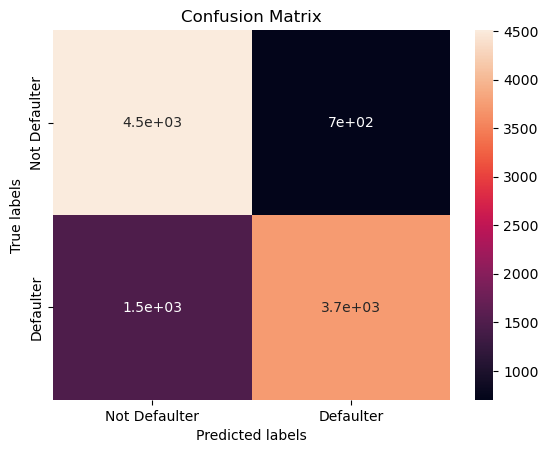

In [492]:
  # Get the confusion matrix for both train and test

labels = ['Not Defaulter', 'Defaulter']
cm = confusion_matrix(y_train, train_class_preds_svm)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [493]:
y_pred_proba_SVC = clf.predict_proba(X_test)[::,1]

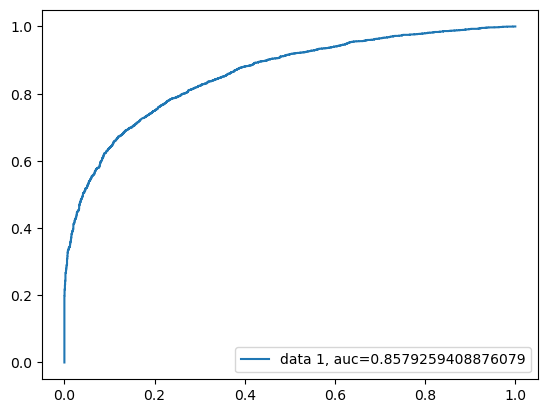

In [494]:
# ROC AUC CURVE
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba_SVC)
auc = roc_auc_score(y_test, y_pred_proba_SVC)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [495]:
credit_df_svc = credit_df_copy.copy()

In [496]:
#define the X and y value
X = credit_df_svc.drop(['default_payment_next_month','total_Payement_Value','Dues'],axis=1)
y = credit_df_svc['default_payment_next_month']

In [497]:
#standardise the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [498]:
#split the data set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify = y)

In [499]:
from sklearn.tree import DecisionTreeClassifier

In [500]:
drug_tree=DecisionTreeClassifier(criterion='entropy',max_depth=10)

In [501]:
drug_tree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10)

In [502]:
predTree=drug_tree.predict(X_test)
train_class_preds_tree = drug_tree.predict(X_train)

In [503]:
train_accuracy_tree = accuracy_score(train_class_preds_tree,y_train)
test_accuracy_tree= accuracy_score(predTree,y_test)

In [504]:
print("The accuracy on train data is ", train_accuracy_tree)
print("The accuracy on test data is ", test_accuracy_tree)

The accuracy on train data is  0.781220026855937
The accuracy on test data is  0.7431853582554517


In [505]:
test_accuracy_tree = accuracy_score(predTree,y_test)
test_precision_score_tree = precision_score(predTree,y_test)
test_recall_score_tree = recall_score(predTree,y_test)
test_f1_score_tree = f1_score(predTree,y_test)
test_roc_score_tree = roc_auc_score(predTree,y_test)

print("The accuracy on test data is ", test_accuracy_tree)
print("The precision on test data is ", test_precision_score_tree)
print("The recall on test data is ", test_recall_score_tree)
print("The f1 on test data is ", test_f1_score_tree)
print("The roc_score on test data is ", test_roc_score_tree)

The accuracy on test data is  0.7431853582554517
The precision on test data is  0.6612149532710281
The recall on test data is  0.7908709827666511
The f1 on test data is  0.720254506892895
The roc_score on test data is  0.7499018680979459


**from the above evalution we get the results as below**
* The accuracy on test data is  **0.7007398753894081**
* The precision on test data is **0.5845015576323987**
* The recall on test data is **0.7615423642820903**
* The f1 on test data is **0.661379158404935**
* The roc_score on test data is  **0.661379158404935**

**this is not the best model because f1-score is just 66 perecent.**

[[4504  709]
 [1572 3641]]


[Text(0, 0.5, 'Not Defaulter'), Text(0, 1.5, 'Defaulter')]

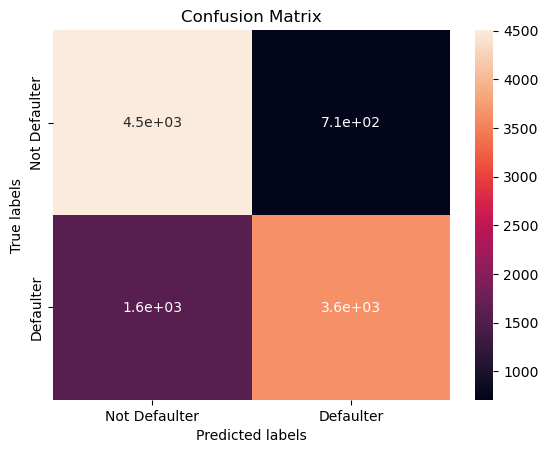

In [506]:
  # Get the confusion matrix for both train and test

labels = ['Not Defaulter', 'Defaulter']
cm = confusion_matrix(y_train, train_class_preds_tree)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [507]:
y_pred_proba_tree = drug_tree.predict_proba(X_test)[::,1]

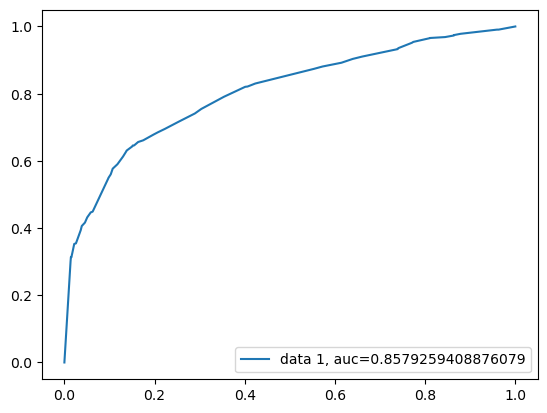

In [508]:
# ROC AUC CURVE
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba_tree)
auc = roc_auc_score(y_test, y_pred_proba_SVC)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

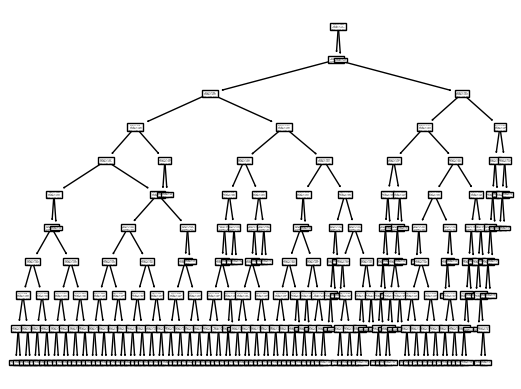

In [509]:
import sklearn.tree as tree
tree.plot_tree(drug_tree)
plt.show()

# **Evaluating the models**

In [510]:
#create a table of all models all score for comparison
classifiers = ['Logistic Regression', 'SVM', 'Random Forest ', 'Decision Tree']
train_accuracy = [train_accuracy_lr, train_accuracy_svm, train_accuracy_rf, train_accuracy_tree]
test_accuracy = [test_accuracy_lr, test_accuracy_svm, test_accuracy_rf, test_accuracy_tree]
precision_score = [test_precision_score_lr, test_precision_score_svm, test_precision_score_rf, test_precision_score_tree]
recall_score = [test_recall_score_lr, test_recall_score_svm, test_recall_score_rf, test_recall_score_tree]
f1_score = [test_f1_score_lr, test_f1_score_svm, test_f1_score_rf, test_f1_score_tree]

In [511]:
pd.DataFrame({'Classifier':classifiers, 'Train Accuracy': train_accuracy, 'Test Accuracy': test_accuracy, 'Precision Score': precision_score, 'Recall Score': recall_score, 'F1 Score': f1_score })

,Classifier,Train Accuracy,Test Accuracy,Precision Score,Recall Score,F1 Score
0,Logistic Regression,0.755899,0.755646,0.686137,0.796924,0.737393
1,SVM,0.791099,0.776285,0.698598,0.827109,0.757441
2,Random Forest,0.999904,0.840343,0.811137,0.861456,0.835540
3,Decision Tree,0.781220,0.743185,0.661215,0.790871,0.720255


* From the table we can see that Random Forest has a highest accuracy

# Feature Importance

In [545]:
def plot_feature_name(importance,name,model_type):
    feature_importance=np.array(importance)
    feature_name=np.array(name)
    data={'feature_names':feature_name,'feature_importance':feature_importance}
    fi_df=pd.DataFrame(data)
    fi_df.sort_values(by=['feature_importance'],ascending=False,inplace=True)
    plt.figure(figsize=(10,20))
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    plt.title(model_type + 'FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')
    

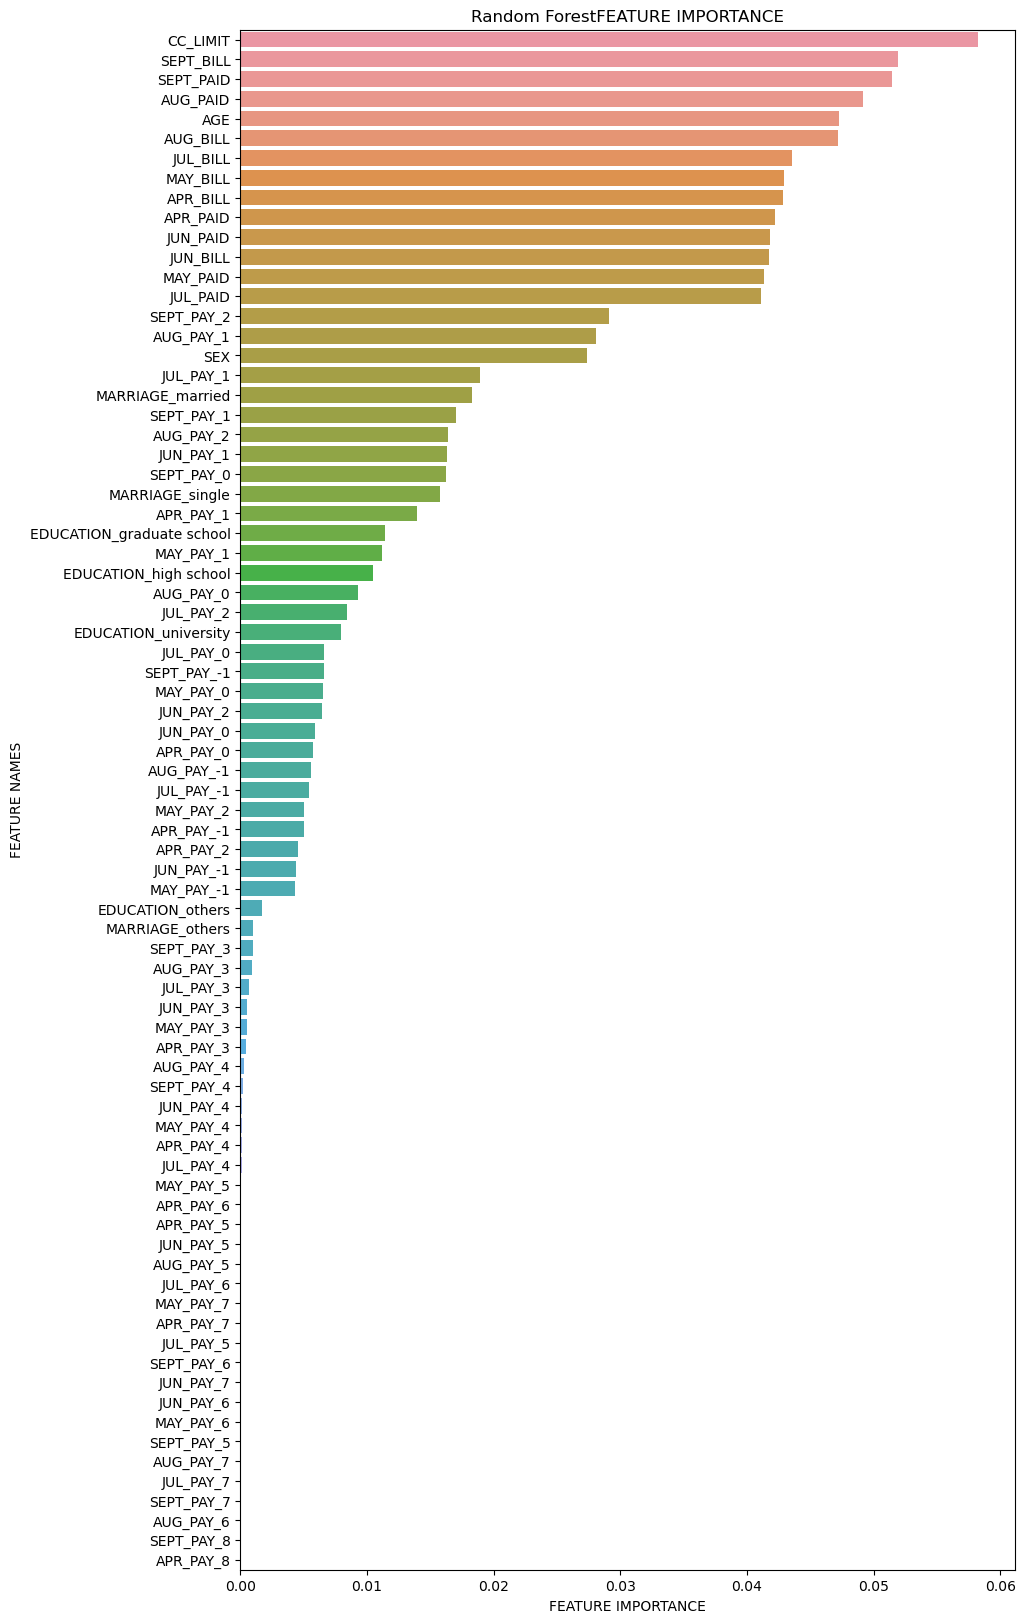

In [546]:
plot_feature_name(optimal_rf_clf.feature_importances_ ,Train.columns,'Random Forest')

* From this graph we can see that in random forest CC_Limit,SEPT_LIMIT,SEPT_PAID are the strongest predictor of future default payment.**

# **Model Recommendation**

* We recommend recall = 0.8, however, the threshold can be adjusted to reach higher recall.

In [547]:
# Compute precision, recall and threshold of Random Forest

precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba)

recalls_80 = recalls[np.argmin(recalls >= 0.80)]               # Recommend recall score = 0.8
precision_80 = precisions[np.argmin(recalls >= 0.80)]
threshold_80_recall = thresholds[np.argmin(recalls >= 0.80)]

thresholds = np.append(thresholds, 1)

recalls_80, precision_80, threshold_80_recall


(0.7986760124610592, 0.8668639053254438, 0.513830808080808)

# MODEL TUNING


* From the above result we can see that Random forest classifier is best for our task so we will tune that classifier

In [550]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier


In [553]:
param_dist = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


# Create RandomizedSearchCV object
random_search = RandomizedSearchCV(
    rf_clf, param_distributions=param_dist, n_iter=10,
    scoring='accuracy', cv=5, n_jobs=-1, random_state=42
)

# Fit the RandomizedSearchCV object to the data
random_search.fit(X_train, y_train)


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'max_depth': [None, 10, 20, 30],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 150, 200]},
                   random_state=42, scoring='accuracy')

In [554]:
best_hyperparameters = random_search.best_params_
print("Best Hyperparameters:", best_hyperparameters)


Best Hyperparameters: {'n_estimators': 150, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': None}


In [555]:
# Train the model on the combined training and validation data
best_model = RandomForestClassifier(**best_hyperparameters)
best_model.fit(X_train, y_train)

# Evaluate the model on the test set
test_accuracy = best_model.score(X_test, y_test)
print("Test Accuracy:", test_accuracy)


Test Accuracy: 0.8282710280373832


# Finalizing Result

Random Forest model has the highest recall, if the business cares recall the most, then this model is the best candidate. If the balance of recall and precision is the most important metric, then Random Forest is the ideal model. Since Random Forest has slightly lower recall but much higher precision than Logistic Regression, I would recommend Random Forest.

* Data categorical variables had minority classes which were added to their closest majority class
* There were not huge gap but male clients tended to default the most.
* Labels of the data were imbalanced and had a significant difference.
* Random Forest Model gave the highest accuracy of 84% on test dataset.
* CC_Limit and SEPT_BILL tended to be the most important feature for our machine learning model.
* The best **accuracy** is obtained for the **Random forest**.

* In general, all models have comparable accuracy. Nevertheless, because the classes are imbalanced (the proportion of non-default credit cards is higher than default) this metric is misleading.

* Furthermore, **accuracy** does not consider the rate of **false positives** (non-default credits cards that were predicted as default) and **false negatives** (default credit cards that were incorrectly predicted as non-default).

* Both cases have negative impact on the bank, since **false positives** leads to unsatisfied customers and **false negatives** leads to financial loss.

* From above table we can see that **Random forest Classifier** having **Recall**, **F1-score**, and **ROC Score** values equals 87%, 84%, and 85%.



In [563]:
credit_df.groupby('EDUCATION').sum(numeric_only=True)['default_payment_next_month'].to_frame().reset_index().corr()

,EDUCATION,default_payment_next_month
EDUCATION,1.000000,0.463259
default_payment_next_month,0.463259,1.000000


In [565]:
import pandas as pd
from IPython.display import FileLink,HTML

In [569]:
csv_filename = 'credit_data.csv'
credit_df.to_csv(csv_filename, index=False)


In [570]:
display(HTML(f'<a href="{csv_filename}" download>Click here to download the CSV file</a>'))


In [579]:
credit_df.groupby('EDUCATION').sum(numeric_only=True)['default_payment_next_month']

EDUCATION
0      10
1     697
2    1089
3     423
Name: default_payment_next_month, dtype: int32